| STUDENT NAME | STUDENT CONTRIBUTION |
|---|---|
| ANJU SUNNY CHUNGATH | Numerical Data handling and ran iteration  |
| MOKSH NARESH JAISWAL | Categorical data handling and Shap |
| UTSAV HARSHADBHAI KHAMAR | Handling outliers and Shap |
| GOKUL KRISHNA POURNAMI GOPI | No contributions |
| ABDULLAH IFTEQAR MOHAMMED | Handled Imbalance data and Numerical data |
| WATAPOTHA KOSINNAGE CHALITHYA SANGEETH KUMARASINGHE | Numerical Columns with sensitivity analysis |
| VAMSI KRISHNA MARADANI | worked on Imbalance handling and Lime|
| CLIFFORD ADDISON | 1st iteration on data before handling imbalance |
| APARNA JAYAKUMAR RESMI | Iteration 3 with fine tuning the model |
| SHAHNAZ PALAKUNNIL MOOSA | Iteration 2 after imbalance handled sensitivity analysis|

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# load the dataset
data = pd.read_csv('bank_data_train2.csv')
data.head(5)

,Unnamed: 0,ID,CR_PROD_CNT_IL,AMOUNT_RUB_CLO_PRC,PRC_ACCEPTS_A_EMAIL_LINK,APP_REGISTR_RGN_CODE,PRC_ACCEPTS_A_POS,PRC_ACCEPTS_A_TK,TURNOVER_DYNAMIC_IL_1M,CNT_TRAN_AUT_TENDENCY1M,...,REST_DYNAMIC_CC_3M,MED_DEBT_PRC_YWZ,LDEAL_ACT_DAYS_PCT_TR3,LDEAL_ACT_DAYS_PCT_AAVG,LDEAL_DELINQ_PER_MAXYWZ,TURNOVER_DYNAMIC_CC_3M,LDEAL_ACT_DAYS_PCT_TR,LDEAL_ACT_DAYS_PCT_TR4,LDEAL_ACT_DAYS_PCT_CURR,TARGET
0,0,146841,0,0.000000,NaN,NaN,NaN,NaN,0.0,NaN,...,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0
1,1,146842,0,0.041033,NaN,NaN,NaN,NaN,0.0,0.166667,...,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0
2,2,146843,0,0.006915,0.0,NaN,0.0,0.0,0.0,NaN,...,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0
3,3,146844,0,0.000000,NaN,NaN,NaN,NaN,0.0,NaN,...,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0
4,4,146845,0,0.000000,NaN,NaN,NaN,NaN,0.0,NaN,...,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0


# Define a function to translate the text
from deep_translator import GoogleTranslator
!pip install deep-translator
def translate_text(text):
    translator = GoogleTranslator(source='ru', target='en')
    try:
        result = translator.translate(text)
        return result
    except TranslationNotFound:
        print(f"Translation not found for: {text}")  # Print the problematic text
        return "Translation Error"  # Return a placeholder to indicate the error

# Apply the function to the dataframe
df['CLNT_JOB_POSITION'] = df['CLNT_JOB_POSITION'].apply(translate_text)

In [3]:
# dropping an unnamed column
data.drop('Unnamed: 0', axis=1, inplace=True)

1. Data overview

In [4]:
print(data.info(116))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 368971 entries, 0 to 368970
Data columns (total 116 columns):
 #    Column                       Dtype  
---   ------                       -----  
 0    ID                           int64  
 1    CR_PROD_CNT_IL               int64  
 2    AMOUNT_RUB_CLO_PRC           float64
 3    PRC_ACCEPTS_A_EMAIL_LINK     float64
 4    APP_REGISTR_RGN_CODE         float64
 5    PRC_ACCEPTS_A_POS            float64
 6    PRC_ACCEPTS_A_TK             float64
 7    TURNOVER_DYNAMIC_IL_1M       float64
 8    CNT_TRAN_AUT_TENDENCY1M      float64
 9    SUM_TRAN_AUT_TENDENCY1M      float64
 10   AMOUNT_RUB_SUP_PRC           float64
 11   PRC_ACCEPTS_A_AMOBILE        float64
 12   SUM_TRAN_AUT_TENDENCY3M      float64
 13   CLNT_TRUST_RELATION          object 
 14   PRC_ACCEPTS_TK               float64
 15   PRC_ACCEPTS_A_MTP            float64
 16   REST_DYNAMIC_FDEP_1M         float64
 17   CNT_TRAN_AUT_TENDENCY3M      float64
 18   CNT_ACCEPTS_TK        

In [5]:
# Getting the count of null values for all attributes
pd.set_option('display.max_row',None)
data.isna().sum()
percentage_of_null =  round(data.isna().sum()*100 / len(data), 2)
print(percentage_of_null)

ID                              0.00
CR_PROD_CNT_IL                  0.00
AMOUNT_RUB_CLO_PRC             10.77
PRC_ACCEPTS_A_EMAIL_LINK       56.31
APP_REGISTR_RGN_CODE           82.59
PRC_ACCEPTS_A_POS              56.31
PRC_ACCEPTS_A_TK               56.31
TURNOVER_DYNAMIC_IL_1M          0.00
CNT_TRAN_AUT_TENDENCY1M        78.02
SUM_TRAN_AUT_TENDENCY1M        78.02
AMOUNT_RUB_SUP_PRC             10.77
PRC_ACCEPTS_A_AMOBILE          56.31
SUM_TRAN_AUT_TENDENCY3M        68.39
CLNT_TRUST_RELATION            79.97
PRC_ACCEPTS_TK                 56.31
PRC_ACCEPTS_A_MTP              56.31
REST_DYNAMIC_FDEP_1M            0.00
CNT_TRAN_AUT_TENDENCY3M        68.39
CNT_ACCEPTS_TK                 56.31
APP_MARITAL_STATUS             80.36
REST_DYNAMIC_SAVE_3M            0.00
CR_PROD_CNT_VCU                 0.00
REST_AVG_CUR                    0.00
CNT_TRAN_MED_TENDENCY1M        80.49
APP_KIND_OF_PROP_HABITATION    82.91
CLNT_JOB_POSITION_TYPE         87.13
AMOUNT_RUB_NAS_PRC             10.77
C

The ID column is unique and it doesnt offer any real insight so not required for further analysis.
Columns with missing percentage > 85% are dropped

In [6]:
# pd.set_option('display.max_column',None)
data1 = data.copy()
missing_features = percentage_of_null[percentage_of_null > 85.00].index
print(missing_features)
data1.drop(missing_features, axis=1, inplace=True)
data1.drop(['ID'],axis=1, inplace=True)

print(data1.shape)

Index(['CLNT_JOB_POSITION_TYPE', 'LDEAL_TENOR_MAX', 'LDEAL_YQZ_CHRG',
       'DEAL_YQZ_IR_MAX', 'LDEAL_YQZ_COM', 'DEAL_YQZ_IR_MIN',
       'LDEAL_TENOR_MIN', 'LDEAL_AMT_MONTH', 'AVG_PCT_MONTH_TO_PCLOSE',
       'MAX_PCLOSE_DATE', 'LDEAL_YQZ_PC', 'LDEAL_DELINQ_PER_MAXYQZ',
       'CLNT_SALARY_VALUE', 'MED_DEBT_PRC_YQZ', 'LDEAL_USED_AMT_AVG_YQZ',
       'AVG_PCT_DEBT_TO_DEAL_AMT'],
      dtype='object')
(368971, 99)


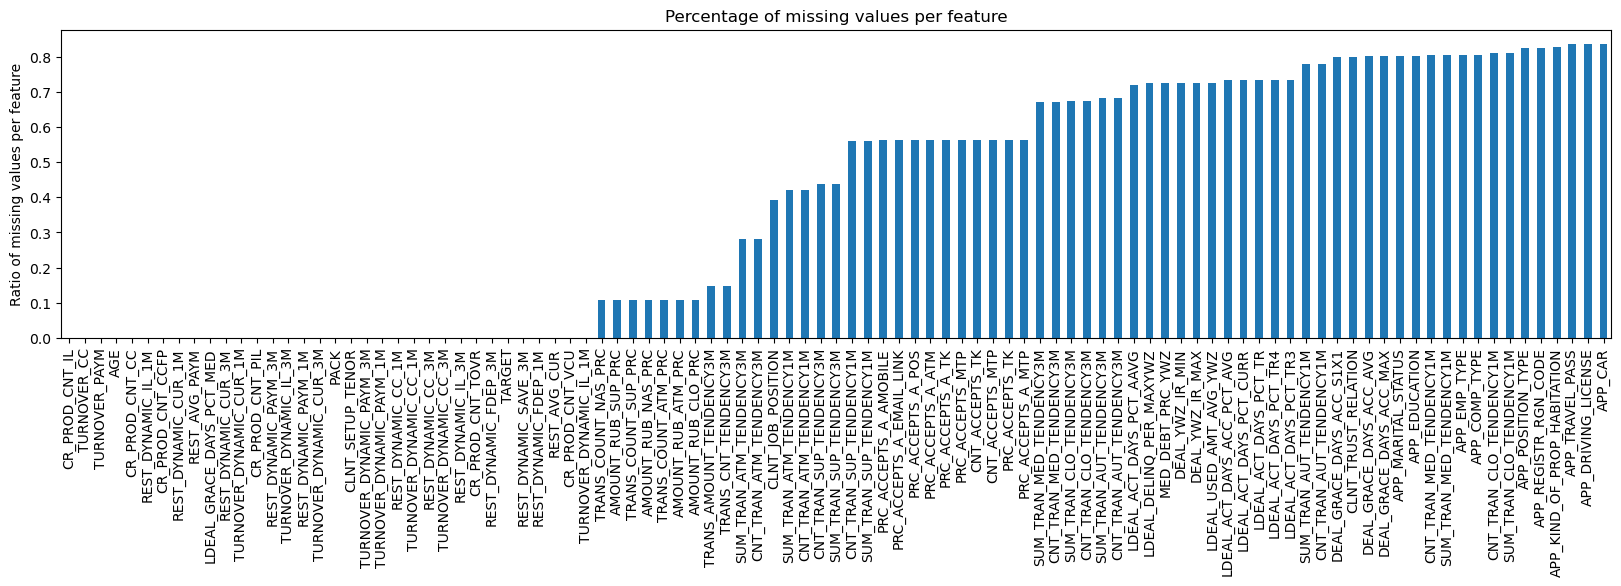

In [7]:
# plot the missing values
data1.isna().mean().sort_values().plot(
    kind="bar", figsize=(20, 4),
    title="Percentage of missing values per feature",
    ylabel="Ratio of missing values per feature");

In [8]:
# split numeric and categorical data
numeric_data = data1.select_dtypes(include=[np.number])
print(numeric_data.shape)

(368971, 87)


In [9]:
numeric_data.describe()

,CR_PROD_CNT_IL,AMOUNT_RUB_CLO_PRC,PRC_ACCEPTS_A_EMAIL_LINK,APP_REGISTR_RGN_CODE,PRC_ACCEPTS_A_POS,PRC_ACCEPTS_A_TK,TURNOVER_DYNAMIC_IL_1M,CNT_TRAN_AUT_TENDENCY1M,SUM_TRAN_AUT_TENDENCY1M,AMOUNT_RUB_SUP_PRC,...,REST_DYNAMIC_CC_3M,MED_DEBT_PRC_YWZ,LDEAL_ACT_DAYS_PCT_TR3,LDEAL_ACT_DAYS_PCT_AAVG,LDEAL_DELINQ_PER_MAXYWZ,TURNOVER_DYNAMIC_CC_3M,LDEAL_ACT_DAYS_PCT_TR,LDEAL_ACT_DAYS_PCT_TR4,LDEAL_ACT_DAYS_PCT_CURR,TARGET
count,368971.000000,329225.000000,161199.0,64224.000000,161199.0,161199.0,368971.000000,81083.000000,81083.000000,329225.000000,...,368971.000000,100647.000000,98225.000000,103255.000000,100647.000000,368971.000000,98225.000000,98225.000000,98225.000000,368971.000000
mean,0.107350,0.044238,0.0,51.164502,0.0,0.0,0.001300,0.415667,0.413421,0.085159,...,0.007623,0.055172,0.025498,0.049821,0.009528,0.004458,0.013748,0.013748,0.013748,0.080800
std,0.436122,0.108776,0.0,21.783560,0.0,0.0,0.028991,0.316214,0.338409,0.141992,...,0.068057,0.216060,0.114962,0.185577,0.094188,0.060892,0.096288,0.096288,0.096288,0.272529
min,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.006944,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.0,34.000000,0.0,0.0,0.000000,0.166667,0.138834,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.0,54.000000,0.0,0.0,0.000000,0.300000,0.284466,0.027282,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.036809,0.0,72.000000,0.0,0.0,0.000000,0.571429,0.658584,0.109859,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,11.000000,1.000000,0.0,89.000000,0.0,0.0,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


We observe that some columns are having min and max value to be same .
There is no variation in the data for the Y to learn hence we can drop those columns

In [10]:
# dictionary to store columns where min value equals max value
columns_with_same_min_max = {}

for column in numeric_data.columns:
    if numeric_data[column].min() == numeric_data[column].max():
        columns_with_same_min_max[column] = numeric_data[column]

# convert the dictionary to a new DataFrame if needed
result_df = pd.DataFrame(columns_with_same_min_max)

print("Columns with same min and max values:")
result_df.describe()

Columns with same min and max values:


,PRC_ACCEPTS_A_EMAIL_LINK,PRC_ACCEPTS_A_POS,PRC_ACCEPTS_A_TK,PRC_ACCEPTS_A_AMOBILE,PRC_ACCEPTS_TK,PRC_ACCEPTS_A_MTP,CNT_ACCEPTS_TK,PRC_ACCEPTS_A_ATM,PRC_ACCEPTS_MTP,CNT_ACCEPTS_MTP
count,161199.0,161199.0,161199.0,161199.0,161199.0,161199.0,161199.0,161199.0,161199.0,161199.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
columns = result_df.columns.tolist()
print(columns)

['PRC_ACCEPTS_A_EMAIL_LINK', 'PRC_ACCEPTS_A_POS', 'PRC_ACCEPTS_A_TK', 'PRC_ACCEPTS_A_AMOBILE', 'PRC_ACCEPTS_TK', 'PRC_ACCEPTS_A_MTP', 'CNT_ACCEPTS_TK', 'PRC_ACCEPTS_A_ATM', 'PRC_ACCEPTS_MTP', 'CNT_ACCEPTS_MTP']


In [12]:
print("shape of data before removing columns: ",data1.shape)

# removing the columns
data1.drop(columns,axis=1, inplace=True)
print("shape of data after removing columns: ",data1.shape)

shape of data before removing columns:  (368971, 99)
shape of data after removing columns:  (368971, 89)


In [13]:
# convert age to years for simplicity
data1['AGE_in_years'] = data1['AGE'] // 12
print(data1['AGE'].unique())
print(data1['AGE_in_years'].unique())
data1.drop(['AGE'],axis = 1,inplace = True)
print(data1.shape)

[ 660  552  420  372  288  384  360  492  348  528  480  576  336  504
  516  732  624  276  540  444  564  432  264  468  648  768  300  588
  396  600  240  612  672  324  792  312  456  780  408  720  804  684
  756  900  828  696  852 1032  228  636  252  708  876  744  816  840
  204  216  924  912  888  936 1056  948  192  984  972  864 1044  180
  168  960 1008  996 1020 1068 1080 1104 1128 1092]
[55 46 35 31 24 32 30 41 29 44 40 48 28 42 43 61 52 23 45 37 47 36 22 39
 54 64 25 49 33 50 20 51 56 27 66 26 38 65 34 60 67 57 63 75 69 58 71 86
 19 53 21 59 73 62 68 70 17 18 77 76 74 78 88 79 16 82 81 72 87 15 14 80
 84 83 85 89 90 92 94 91]
(368971, 89)


In [14]:
numeric_data_v1 = data1.select_dtypes(include=[np.number])
print(numeric_data_v1.shape)

(368971, 77)


In [15]:
pd.set_option('display.max_column',None)
numeric_data_v1.describe()

,CR_PROD_CNT_IL,AMOUNT_RUB_CLO_PRC,APP_REGISTR_RGN_CODE,TURNOVER_DYNAMIC_IL_1M,CNT_TRAN_AUT_TENDENCY1M,SUM_TRAN_AUT_TENDENCY1M,AMOUNT_RUB_SUP_PRC,SUM_TRAN_AUT_TENDENCY3M,REST_DYNAMIC_FDEP_1M,CNT_TRAN_AUT_TENDENCY3M,REST_DYNAMIC_SAVE_3M,CR_PROD_CNT_VCU,REST_AVG_CUR,CNT_TRAN_MED_TENDENCY1M,AMOUNT_RUB_NAS_PRC,TRANS_COUNT_SUP_PRC,CNT_TRAN_CLO_TENDENCY1M,SUM_TRAN_MED_TENDENCY1M,TRANS_COUNT_NAS_PRC,CR_PROD_CNT_TOVR,CR_PROD_CNT_PIL,SUM_TRAN_CLO_TENDENCY1M,TURNOVER_CC,TRANS_COUNT_ATM_PRC,AMOUNT_RUB_ATM_PRC,TURNOVER_PAYM,CNT_TRAN_MED_TENDENCY3M,CR_PROD_CNT_CC,SUM_TRAN_MED_TENDENCY3M,REST_DYNAMIC_FDEP_3M,REST_DYNAMIC_IL_1M,SUM_TRAN_CLO_TENDENCY3M,CR_PROD_CNT_CCFP,CNT_TRAN_CLO_TENDENCY3M,REST_DYNAMIC_CUR_1M,REST_AVG_PAYM,LDEAL_GRACE_DAYS_PCT_MED,REST_DYNAMIC_CUR_3M,CNT_TRAN_SUP_TENDENCY3M,TURNOVER_DYNAMIC_CUR_1M,REST_DYNAMIC_PAYM_3M,SUM_TRAN_SUP_TENDENCY3M,REST_DYNAMIC_IL_3M,CNT_TRAN_ATM_TENDENCY3M,CNT_TRAN_ATM_TENDENCY1M,TURNOVER_DYNAMIC_IL_3M,SUM_TRAN_ATM_TENDENCY3M,DEAL_GRACE_DAYS_ACC_S1X1,DEAL_YWZ_IR_MIN,SUM_TRAN_SUP_TENDENCY1M,DEAL_YWZ_IR_MAX,SUM_TRAN_ATM_TENDENCY1M,REST_DYNAMIC_PAYM_1M,CNT_TRAN_SUP_TENDENCY1M,DEAL_GRACE_DAYS_ACC_AVG,TURNOVER_DYNAMIC_CUR_3M,CLNT_SETUP_TENOR,DEAL_GRACE_DAYS_ACC_MAX,TURNOVER_DYNAMIC_PAYM_3M,TURNOVER_DYNAMIC_PAYM_1M,TRANS_AMOUNT_TENDENCY3M,TRANS_CNT_TENDENCY3M,REST_DYNAMIC_CC_1M,LDEAL_USED_AMT_AVG_YWZ,TURNOVER_DYNAMIC_CC_1M,LDEAL_ACT_DAYS_ACC_PCT_AVG,REST_DYNAMIC_CC_3M,MED_DEBT_PRC_YWZ,LDEAL_ACT_DAYS_PCT_TR3,LDEAL_ACT_DAYS_PCT_AAVG,LDEAL_DELINQ_PER_MAXYWZ,TURNOVER_DYNAMIC_CC_3M,LDEAL_ACT_DAYS_PCT_TR,LDEAL_ACT_DAYS_PCT_TR4,LDEAL_ACT_DAYS_PCT_CURR,TARGET,AGE_in_years
count,368971.000000,329225.000000,64224.000000,368971.000000,81083.000000,81083.000000,329225.000000,116621.000000,368971.000000,116621.000000,368971.000000,368971.000000,3.689710e+05,71993.000000,329225.000000,329225.000000,69116.000000,71993.000000,329225.000000,368971.000000,368971.000000,6.911600e+04,3.689710e+05,329225.000000,329225.000000,3.689710e+05,120958.000000,368971.000000,120958.000000,368971.000000,368971.000000,119884.000000,368971.000000,119884.000000,368971.000000,3.689710e+05,368971.000000,368971.000000,206913.000000,368971.000000,368971.000000,206913.000000,368971.000000,265309.000000,213624.000000,368971.000000,265309.000000,73930.000000,100647.000000,162423.000000,100647.000000,213624.000000,368971.000000,162423.000000,72822.000000,368971.000000,368971.000000,72822.000000,368971.000000,368971.000000,315006.000000,315006.000000,368971.000000,100647.000000,368971.000000,98225.000000,368971.000000,100647.000000,98225.000000,103255.000000,100647.000000,368971.000000,98225.000000,98225.000000,98225.000000,368971.000000,368971.000000
mean,0.107350,0.044238,51.164502,0.001300,0.415667,0.413421,0.085159,0.688165,0.000720,0.690631,0.063581,0.031948,6.722892e+04,0.443163,0.024009,0.190902,0.479168,0.436615,0.050989,0.314513,0.058595,4.722218e-01,5.257269e+02,0.368726,0.597058,1.433972e+04,0.700303,0.074797,0.695851,0.003926,0.001648,0.696730,0.005025,0.699547,0.212458,7.000383e+03,0.001858,0.499398,0.642137,0.204424,0.075615,0.626698,0.005696,0.627811,0.327233,0.004021,0.617053,0.029855,37.114360,0.327241,39.495084,0.322193,0.027366,0.340076,0.025342,0.485551,4.409335,0.030201,0.071000,0.024823,0.581797,0.596897,0.002276,0.899246,0.000915,0.051641,0.007623,0.055172,0.025498,0.049821,0.009528,0.004458,0.013748,0.013748,0.013748,0.080800,38.189489
std,0.436122,0.108776,21.783560,0.028991,0.316214,0.338409,0.141992,0.301729,0.014067,0.276500,0.203112,0.186120,1.959987e+05,0.323676,0.090836,0.195232,0.330048,0.361814,0.116500,0.594707,0.300279,3.613823e-01,1.256289e+04,0.342705,0.363734,1.437817e+05,0.281916,0.301372,0.322188,0.045501,0.023975,0.322473,0.076948,0.289750,0.235997,4.672665e+04,0.039794,0.298803,0.267400,0.254952,0.202984,0.294976,0.056783,0.263238,0.274831,0.052996,0.303220,0.148261,12.529128,0.301161,10.509335,0.306326,0.096934,0.281075,0.142990,0.331244,2.950525,0.176380,0.205737,0.104048,0.282398,0.247126,0.026733,0.

In [16]:
categorical_data = data1.select_dtypes(include='object')
print(categorical_data.shape)
print(categorical_data.head(5))

(368971, 12)
  CLNT_TRUST_RELATION APP_MARITAL_STATUS APP_KIND_OF_PROP_HABITATION  \
0                 NaN                NaN                         NaN   
1                 NaN                NaN                         NaN   
2                 NaN                NaN                         NaN   
3                 NaN                NaN                         NaN   
4                 NaN                NaN                         NaN   

  CLNT_JOB_POSITION APP_DRIVING_LICENSE APP_EDUCATION APP_TRAVEL_PASS APP_CAR  \
0   DEPARTMENT HEAD                 NaN           NaN             NaN     NaN   
1               NaN                 NaN           NaN             NaN     NaN   
2               CEO                 NaN           NaN             NaN     NaN   
3       IAO MANAGER                 NaN           NaN             NaN     NaN   
4               NaN                 NaN           NaN             NaN     NaN   

  APP_POSITION_TYPE APP_EMP_TYPE APP_COMP_TYPE PACK  
0            

In [17]:
categorical_data.describe()

,CLNT_TRUST_RELATION,APP_MARITAL_STATUS,APP_KIND_OF_PROP_HABITATION,CLNT_JOB_POSITION,APP_DRIVING_LICENSE,APP_EDUCATION,APP_TRAVEL_PASS,APP_CAR,APP_POSITION_TYPE,APP_EMP_TYPE,APP_COMP_TYPE,PACK
count,73888,72468,63051,224314,60607,72323,60607,60606,64311,71525,71525,368971
unique,21,13,5,11680,2,17,2,2,4,4,4,12
top,FRIEND,M,SO,DIRECTOR,N,H,N,N,SPECIALIST,PRIVATE,PRIVATE,102
freq,26441,32769,29842,25130,38102,45343,55803,34388,38182,62993,62993,120628


In [18]:
##drop CLNT_JOB_POSITION because it has too many categories.
#print(data1['CLNT_JOB_POSITION'].unique())
#print(data1['CLNT_JOB_POSITION'].value_counts())

#data1.drop(['CLNT_JOB_POSITION'], axis = 1, inplace = True)
#print(data1.shape)

In [19]:
print(data1['CLNT_TRUST_RELATION'].unique())
print(data1['CLNT_TRUST_RELATION'].value_counts())


[nan 'MOTHER' 'BROTHER' 'FRIEND' 'SISTER' 'OTHER' 'RELATIVE' 'DAUGHTER'
 'SON' 'FATHER' 'Близкий ро' 'Друг' 'Отец' 'Сестра' 'Сын' 'Мать' 'Муж'
 'Брат' 'мать' 'Дальний ро' 'Дочь' 'Жена']
CLNT_TRUST_RELATION
FRIEND        26441
MOTHER        11745
RELATIVE       8722
OTHER          7140
BROTHER        6004
SISTER         5869
FATHER         3243
DAUGHTER       2137
SON            2089
Друг            230
Мать            100
Близкий ро       50
Брат             34
Отец             29
Сестра           20
Дочь             10
Сын               8
Дальний ро        6
Муж               5
мать              3
Жена              3
Name: count, dtype: int64


The CLNT_TRUST_RELATION variable has mising percentage around 81% . When we checked the unique value there are values like -- hwhich is 1% of the obverall data we can impute those valtry to convert it to english language.
Близкий ро - Close relative
Друг - Friend
Отец - Father
Сестра - Sister
Сын - Son
Мать - Mother
Муж - Husband
Брат - Brother
мать - mother
Дальний ро - Distant relative
Дочь - Daughter
Жена - Wife

In [20]:
replace_dict = {
    'Близкий ро': 'CLOSE RELATIVE',
    'Друг': 'FRIEND',
    'Отец': 'FATHER',
    'Сестра': 'SISTER',
    'Сын': 'SON',
    'Мать': 'MOTHER',
    'Муж': 'HUSBAND',
    'Брат': 'BROTHER',
    'мать': 'MOTHER',
    'Дальний ро': 'DISTANT RELATIVE',
    'Дочь': 'DAUGHTER',
    'Жена': 'WIFE'
}

# Replace values in the column
data1['CLNT_TRUST_RELATION'] = data1['CLNT_TRUST_RELATION'].replace(replace_dict)
print(data1['CLNT_TRUST_RELATION'].value_counts())

CLNT_TRUST_RELATION
FRIEND              26671
MOTHER              11848
RELATIVE             8722
OTHER                7140
BROTHER              6038
SISTER               5889
FATHER               3272
DAUGHTER             2147
SON                  2097
CLOSE RELATIVE         50
DISTANT RELATIVE        6
HUSBAND                 5
WIFE                    3
Name: count, dtype: int64


In [21]:
print(data1['APP_MARITAL_STATUS'].unique())
print(data1['APP_MARITAL_STATUS'].value_counts())

[nan 'D' 'M' 'v' 'V' 'T' 'm' 'N' ' ' 'W' 't' 'd' 'C' 'w']
APP_MARITAL_STATUS
M    32769
V    23380
D     7857
T     3392
m     1611
N     1014
v      928
W      664
d      442
t      181
C      157
w       56
        17
Name: count, dtype: int64


The APP_MARITAL_STATUS has 13 unique value.first we convert the column to one class either upper or lower so that the we can reduve the unique values. Moreover c,v,t means married,singled,widowed in latin. so we need to convert to actual values in the data.

In [22]:
# values to uppercase
data1['APP_MARITAL_STATUS'] = data1['APP_MARITAL_STATUS'].str.upper()


marital_status_map = {
    'C': 'M',
    'V': 'N',
    'T': 'W',
    np.nan: ' '
}

# Mapping
data1['APP_MARITAL_STATUS'] = data1['APP_MARITAL_STATUS'].replace(marital_status_map)
print(data1['APP_MARITAL_STATUS'].unique())

[' ' 'D' 'M' 'N' 'W']


In [23]:
print(data1['APP_KIND_OF_PROP_HABITATION'].unique())
print(data1['APP_KIND_OF_PROP_HABITATION'].value_counts())

[nan 'SO' 'RENT' 'OTHER' 'JO' 'NPRIVAT']
APP_KIND_OF_PROP_HABITATION
SO         29842
JO         15054
OTHER      11992
RENT        3409
NPRIVAT     2754
Name: count, dtype: int64


In [24]:
print(data1['APP_DRIVING_LICENSE'].unique())
print(data1['APP_DRIVING_LICENSE'].value_counts())

[nan 'Y' 'N']
APP_DRIVING_LICENSE
N    38102
Y    22505
Name: count, dtype: int64


In [25]:
print(data1['APP_EDUCATION'].unique())
print(data1['APP_EDUCATION'].value_counts())

[nan 'S' 'HH' 'h' 'H' 'SS' 'UH' 'A' 's' 'i' 'US' 'e' 'I' 'HI' 'a' 'AV' 'E'
 'AC']
APP_EDUCATION
H     45343
SS    10563
UH     6611
S      3397
h      2117
HH     2107
s       629
A       581
i       415
US      218
I       205
HI       58
a        43
e        14
E        10
AC        7
AV        5
Name: count, dtype: int64


The variable 'APP_EDUCATION' is a ordinal data we can use label encoding. Also need to change to one case.

In [26]:
data1['APP_EDUCATION'] = data1['APP_EDUCATION'].str.upper()
print(data1['APP_EDUCATION'].unique())
print(data1['APP_EDUCATION'].value_counts())

[nan 'S' 'HH' 'H' 'SS' 'UH' 'A' 'I' 'US' 'E' 'HI' 'AV' 'AC']
APP_EDUCATION
H     47460
SS    10563
UH     6611
S      4026
HH     2107
A       624
I       620
US      218
HI       58
E        24
AC        7
AV        5
Name: count, dtype: int64


In [27]:
print(data1['APP_TRAVEL_PASS'].unique())
print(data1['APP_TRAVEL_PASS'].value_counts())

[nan 'N' 'Y']
APP_TRAVEL_PASS
N    55803
Y     4804
Name: count, dtype: int64


The variable 'APP_TRAVEL_PASS' can be converted using one hot encoding and nan can be considered as missing category

In [28]:
print(data1['APP_CAR'].unique())
print(data1['APP_CAR'].value_counts())

[nan 'N' 'Y']
APP_CAR
N    34388
Y    26218
Name: count, dtype: int64


The variable 'APP_CAR' can be converted using one hot encoding and nan can be considered as missing category

In [29]:
print(data1['APP_POSITION_TYPE'].unique())
print(data1['APP_POSITION_TYPE'].value_counts())

[nan 'SPECIALIST' 'SELF_EMPL' 'MANAGER' 'TOP_MANAGER']
APP_POSITION_TYPE
SPECIALIST     38182
MANAGER        12808
TOP_MANAGER     9321
SELF_EMPL       4000
Name: count, dtype: int64


The variable 'APP_POSITION_TYPE' can be converted using one hot encoding and nan can be considered as missing category

In [30]:
#APP_EMP_TYPE
print(data1['APP_EMP_TYPE'].unique())
print(data1['APP_EMP_TYPE'].value_counts())

[nan 'PRIVATE' 'STATE' 'IP' 'INTER']
APP_EMP_TYPE
PRIVATE    62993
STATE       6212
INTER       1438
IP           882
Name: count, dtype: int64


The variable 'APP_EMP_TYPE' can be converted using one hot encoding and nan can be considered as missing category

In [31]:
print(data1['APP_COMP_TYPE'].unique())
print(data1['APP_COMP_TYPE'].value_counts())
##check
print(data1['APP_EMP_TYPE'].equals(data1['APP_COMP_TYPE']))

[nan 'PRIVATE' 'STATE' 'IP' 'INTER']
APP_COMP_TYPE
PRIVATE    62993
STATE       6212
INTER       1438
IP           882
Name: count, dtype: int64
True


The variable 'APP_EMP_TYPE' and 'APP_COMP_TYPE' looks same so we can drop one column.

In [32]:
data1.drop(['APP_COMP_TYPE'],axis = 1,inplace = True)
print(data1.shape)

(368971, 88)


In [33]:
print(data1['PACK'].unique())
print(data1['PACK'].value_counts())

['K01' '102' '105' 'O01' '103' '101' '107' '301' '104' '108' '109' 'M01']
PACK
102    120628
K01     81393
O01     52154
105     45977
107     28708
103     26393
104      7431
301      4310
101      1879
109        89
M01         7
108         2
Name: count, dtype: int64


The variable 'PACK' need to converted using one hot encoding


In [34]:
data1.columns

Index(['CR_PROD_CNT_IL', 'AMOUNT_RUB_CLO_PRC', 'APP_REGISTR_RGN_CODE',
       'TURNOVER_DYNAMIC_IL_1M', 'CNT_TRAN_AUT_TENDENCY1M',
       'SUM_TRAN_AUT_TENDENCY1M', 'AMOUNT_RUB_SUP_PRC',
       'SUM_TRAN_AUT_TENDENCY3M', 'CLNT_TRUST_RELATION',
       'REST_DYNAMIC_FDEP_1M', 'CNT_TRAN_AUT_TENDENCY3M', 'APP_MARITAL_STATUS',
       'REST_DYNAMIC_SAVE_3M', 'CR_PROD_CNT_VCU', 'REST_AVG_CUR',
       'CNT_TRAN_MED_TENDENCY1M', 'APP_KIND_OF_PROP_HABITATION',
       'AMOUNT_RUB_NAS_PRC', 'CLNT_JOB_POSITION', 'APP_DRIVING_LICENSE',
       'TRANS_COUNT_SUP_PRC', 'APP_EDUCATION', 'CNT_TRAN_CLO_TENDENCY1M',
       'SUM_TRAN_MED_TENDENCY1M', 'TRANS_COUNT_NAS_PRC', 'APP_TRAVEL_PASS',
       'CR_PROD_CNT_TOVR', 'APP_CAR', 'CR_PROD_CNT_PIL',
       'SUM_TRAN_CLO_TENDENCY1M', 'APP_POSITION_TYPE', 'TURNOVER_CC',
       'TRANS_COUNT_ATM_PRC', 'AMOUNT_RUB_ATM_PRC', 'TURNOVER_PAYM',
       'CNT_TRAN_MED_TENDENCY3M', 'CR_PROD_CNT_CC', 'SUM_TRAN_MED_TENDENCY3M',
       'REST_DYNAMIC_FDEP_3M', 'REST_DYNAMIC_IL

In [35]:
#Train Test Split #80-20 split
from sklearn.model_selection import train_test_split

# Separate features and target variable
X = data1.drop(['TARGET'],axis=1)
Y = data1['TARGET']


# split: 80% train and 20% test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=181)

print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)
print("original:", X.shape)

Training set shape: (295176, 87)
Test set shape: (73795, 87)
original: (368971, 87)


In [36]:
categorical_columns = list(X.select_dtypes(include='object').columns)

In [37]:
numeric_columns=list(X.select_dtypes(include=[np.number]).columns)

In [38]:
X_train.shape

(295176, 87)

In [39]:
from scipy.stats import mstats

for column in numeric_columns:
    X_train[column] = mstats.winsorize(X_train[column], limits=[0.10, 0.10])
    updated_mean = X_train[column].mean()
    X_train[column].fillna(updated_mean,inplace = True)
    X_test[column].fillna(updated_mean,inplace = True)


In [40]:
#Scaling of Numeric Data Using standard scaler

from sklearn.preprocessing import StandardScaler,MinMaxScaler

scaler = StandardScaler()
scaler_model = scaler.fit(X_train[numeric_columns])

scaled_array =  scaler_model.transform(X_train[numeric_columns])
scaled_df = pd.DataFrame(scaled_array, columns=numeric_columns, index=X_train.index)
X_train[numeric_columns]=scaled_df

scaled_array =  scaler_model.transform(X_test[numeric_columns])
scaled_df = pd.DataFrame(scaled_array, columns=numeric_columns, index=X_test.index)
X_test[numeric_columns]=scaled_df

In [41]:
X_train[numeric_columns].describe()

,CR_PROD_CNT_IL,AMOUNT_RUB_CLO_PRC,APP_REGISTR_RGN_CODE,TURNOVER_DYNAMIC_IL_1M,CNT_TRAN_AUT_TENDENCY1M,SUM_TRAN_AUT_TENDENCY1M,AMOUNT_RUB_SUP_PRC,SUM_TRAN_AUT_TENDENCY3M,REST_DYNAMIC_FDEP_1M,CNT_TRAN_AUT_TENDENCY3M,REST_DYNAMIC_SAVE_3M,CR_PROD_CNT_VCU,REST_AVG_CUR,CNT_TRAN_MED_TENDENCY1M,AMOUNT_RUB_NAS_PRC,TRANS_COUNT_SUP_PRC,CNT_TRAN_CLO_TENDENCY1M,SUM_TRAN_MED_TENDENCY1M,TRANS_COUNT_NAS_PRC,CR_PROD_CNT_TOVR,CR_PROD_CNT_PIL,SUM_TRAN_CLO_TENDENCY1M,TURNOVER_CC,TRANS_COUNT_ATM_PRC,AMOUNT_RUB_ATM_PRC,TURNOVER_PAYM,CNT_TRAN_MED_TENDENCY3M,CR_PROD_CNT_CC,SUM_TRAN_MED_TENDENCY3M,REST_DYNAMIC_FDEP_3M,REST_DYNAMIC_IL_1M,SUM_TRAN_CLO_TENDENCY3M,CR_PROD_CNT_CCFP,CNT_TRAN_CLO_TENDENCY3M,REST_DYNAMIC_CUR_1M,REST_AVG_PAYM,LDEAL_GRACE_DAYS_PCT_MED,REST_DYNAMIC_CUR_3M,CNT_TRAN_SUP_TENDENCY3M,TURNOVER_DYNAMIC_CUR_1M,REST_DYNAMIC_PAYM_3M,SUM_TRAN_SUP_TENDENCY3M,REST_DYNAMIC_IL_3M,CNT_TRAN_ATM_TENDENCY3M,CNT_TRAN_ATM_TENDENCY1M,TURNOVER_DYNAMIC_IL_3M,SUM_TRAN_ATM_TENDENCY3M,DEAL_GRACE_DAYS_ACC_S1X1,DEAL_YWZ_IR_MIN,SUM_TRAN_SUP_TENDENCY1M,DEAL_YWZ_IR_MAX,SUM_TRAN_ATM_TENDENCY1M,REST_DYNAMIC_PAYM_1M,CNT_TRAN_SUP_TENDENCY1M,DEAL_GRACE_DAYS_ACC_AVG,TURNOVER_DYNAMIC_CUR_3M,CLNT_SETUP_TENOR,DEAL_GRACE_DAYS_ACC_MAX,TURNOVER_DYNAMIC_PAYM_3M,TURNOVER_DYNAMIC_PAYM_1M,TRANS_AMOUNT_TENDENCY3M,TRANS_CNT_TENDENCY3M,REST_DYNAMIC_CC_1M,LDEAL_USED_AMT_AVG_YWZ,TURNOVER_DYNAMIC_CC_1M,LDEAL_ACT_DAYS_ACC_PCT_AVG,REST_DYNAMIC_CC_3M,MED_DEBT_PRC_YWZ,LDEAL_ACT_DAYS_PCT_TR3,LDEAL_ACT_DAYS_PCT_AAVG,LDEAL_DELINQ_PER_MAXYWZ,TURNOVER_DYNAMIC_CC_3M,LDEAL_ACT_DAYS_PCT_TR,LDEAL_ACT_DAYS_PCT_TR4,LDEAL_ACT_DAYS_PCT_CURR,AGE_in_years
count,295176.0,2.951760e+05,2.951760e+05,295176.0,2.951760e+05,2.951760e+05,2.951760e+05,2.951760e+05,295176.0,2.951760e+05,2.951760e+05,295176.0,2.951760e+05,2.951760e+05,2.951760e+05,2.951760e+05,2.951760e+05,2.951760e+05,2.951760e+05,2.951760e+05,295176.0,2.951760e+05,295176.0,2.951760e+05,2.951760e+05,2.951760e+05,2.951760e+05,295176.0,2.951760e+05,295176.0,295176.0,2.951760e+05,295176.0,2.951760e+05,2.951760e+05,2.951760e+05,295176.0,2.951760e+05,2.951760e+05,2.951760e+05,2.951760e+05,2.951760e+05,295176.0,2.951760e+05,2.951760e+05,295176.0,2.951760e+05,2.951760e+05,2.951760e+05,2.951760e+05,2.951760e+05,2.951760e+05,2.951760e+05,2.951760e+05,2.951760e+05,2.951760e+05,2.951760e+05,2.951760e+05,2.951760e+05,2.951760e+05,2.951760e+05,2.951760e+05,295176.0,295176.0,295176.0,2.951760e+05,295176.0,2.951760e+05,2.951760e+05,2.951760e+05,2.951760e+05,295176.0,2.951760e+05,2.951760e+05,2.951760e+05,2.951760e+05
mean,0.0,-1.020947e-17,1.920737e-15,0.0,8.730372e-16,4.604460e-16,-1.136913e-16,-2.014367e-15,0.0,-1.357519e-15,-1.029372e-16,0.0,9.302861e-17,7.426160e-18,2.569668e-18,-2.840898e-16,2.658734e-17,-2.483010e-17,-6.765990e-17,1.699321e-17,0.0,2.075209e-15,0.0,1.357050e-16,-3.352665e-16,1.398333e-16,-2.322023e-15,0.0,-1.172804e-15,0.0,0.0,1.444503e-15,0.0,-2.518636e-16,-2.674080e-17,7.991849e-17,0.0,2.989722e-17,2.155633e-16,2.130959e-16,1.706693e-17,6.473758e-16,0.0,-5.795113e-16,-2.326813e-16,0.0,-5.196567e-16,2.491668e-16,1.052234e-14,9.692524e-17,4.702869e-14,3.071446e-16,6.253862e-17,5.374759e-16,2.598554e-17,3.020052e-16,-3.092749e-16,1.618831e-16,-9.869452e-17,-8.039992e-18,5.488799e-16,-2.602526e-16,0.0,0.0,0.0,7.053047e-18,0.0,1.156652e-17,1.712109e-18,1.168146e-16,-7.212523e-18,0.0,-1.517970e-16,-1.517970e-16,-1.517970e-16,-3.407609e-16
std,0.0,1.000002e+00,1.000002e+00,0.0,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,0.0,1.000002e+00,1.000002e+00,0.0,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,0.0,1.000002e+00,0.0,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,0.0,1.000002e+00,0.0,0.0,1.000002e+00,0.0,1.000002e+00,1.000002e+00,1.000002e+00,0.0,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,0.0,1.000002e+00,1.000002e+00,0.0,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+

In [42]:
#one hot encoding the categorical variables
print(categorical_columns)

['CLNT_TRUST_RELATION', 'APP_MARITAL_STATUS', 'APP_KIND_OF_PROP_HABITATION', 'CLNT_JOB_POSITION', 'APP_DRIVING_LICENSE', 'APP_EDUCATION', 'APP_TRAVEL_PASS', 'APP_CAR', 'APP_POSITION_TYPE', 'APP_EMP_TYPE', 'PACK']


In [43]:
X_train[categorical_columns].info()

<class 'pandas.core.frame.DataFrame'>
Index: 295176 entries, 297315 to 325945
Data columns (total 11 columns):
 #   Column                       Non-Null Count   Dtype 
---  ------                       --------------   ----- 
 0   CLNT_TRUST_RELATION          59155 non-null   object
 1   APP_MARITAL_STATUS           295176 non-null  object
 2   APP_KIND_OF_PROP_HABITATION  50604 non-null   object
 3   CLNT_JOB_POSITION            179549 non-null  object
 4   APP_DRIVING_LICENSE          48611 non-null   object
 5   APP_EDUCATION                58021 non-null   object
 6   APP_TRAVEL_PASS              48611 non-null   object
 7   APP_CAR                      48611 non-null   object
 8   APP_POSITION_TYPE            51596 non-null   object
 9   APP_EMP_TYPE                 57345 non-null   object
 10  PACK                         295176 non-null  object
dtypes: object(11)
memory usage: 27.0+ MB


In [44]:
print(X_train['CLNT_TRUST_RELATION'].fillna('NO_RELATION',inplace = False).value_counts())
#As No relation has maximum occurances we will also keep that as a category
X_train['CLNT_TRUST_RELATION'].fillna('NO_RELATION',inplace = True)
X_test['CLNT_TRUST_RELATION'].fillna('NO_RELATION',inplace = True)

CLNT_TRUST_RELATION
NO_RELATION         236021
FRIEND               21323
MOTHER                9460
RELATIVE              7003
OTHER                 5771
BROTHER               4823
SISTER                4745
FATHER                2609
DAUGHTER              1705
SON                   1662
CLOSE RELATIVE          42
DISTANT RELATIVE         5
HUSBAND                  4
WIFE                     3
Name: count, dtype: int64


In [45]:
X_train['APP_KIND_OF_PROP_HABITATION'].fillna('OTHER',inplace = True)
X_test['APP_KIND_OF_PROP_HABITATION'].fillna('OTHER',inplace = True)

In [46]:
X_train['APP_DRIVING_LICENSE'].fillna('N',inplace = True)
X_test['APP_DRIVING_LICENSE'].fillna('N',inplace = True)

In [47]:
X_train['APP_EDUCATION'].value_counts()

X_train.groupby(['AGE_in_years'])['APP_EDUCATION'].agg(pd.Series.mode)

X_train['APP_EDUCATION'].fillna('H',inplace = True)
X_test['APP_EDUCATION'].fillna('H',inplace = True)

In [48]:
X_train['APP_TRAVEL_PASS'].fillna('MISSING',inplace = True)
X_test['APP_TRAVEL_PASS'].fillna('MISSING',inplace = True)

In [49]:
X_train['APP_CAR'].fillna('MISSING',inplace = True)
X_test['APP_CAR'].fillna('MISSING',inplace = True)

In [50]:
X_train['APP_POSITION_TYPE'].fillna('MISSING',inplace = True)
X_test['APP_POSITION_TYPE'].fillna('MISSING',inplace = True)

In [51]:
X_train['APP_EMP_TYPE'].fillna('MISSING',inplace = True)
X_test['APP_EMP_TYPE'].fillna('MISSING',inplace = True)

In [52]:
X_train['CLNT_JOB_POSITION'].fillna('MISSING',inplace = True)
X_test['CLNT_JOB_POSITION'].fillna('MISSING',inplace = True)

In [53]:
X_train['APP_MARITAL_STATUS'].fillna('MISSING',inplace = True)
X_test['APP_MARITAL_STATUS'].fillna('MISSING',inplace = True)

In [54]:
X_train[categorical_columns].info()

<class 'pandas.core.frame.DataFrame'>
Index: 295176 entries, 297315 to 325945
Data columns (total 11 columns):
 #   Column                       Non-Null Count   Dtype 
---  ------                       --------------   ----- 
 0   CLNT_TRUST_RELATION          295176 non-null  object
 1   APP_MARITAL_STATUS           295176 non-null  object
 2   APP_KIND_OF_PROP_HABITATION  295176 non-null  object
 3   CLNT_JOB_POSITION            295176 non-null  object
 4   APP_DRIVING_LICENSE          295176 non-null  object
 5   APP_EDUCATION                295176 non-null  object
 6   APP_TRAVEL_PASS              295176 non-null  object
 7   APP_CAR                      295176 non-null  object
 8   APP_POSITION_TYPE            295176 non-null  object
 9   APP_EMP_TYPE                 295176 non-null  object
 10  PACK                         295176 non-null  object
dtypes: object(11)
memory usage: 27.0+ MB


In [55]:
#lable encoding
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()
label_encoder.fit(X_train['APP_EDUCATION'])

X_train['APP_EDUCATION'] = label_encoder.transform(X_train['APP_EDUCATION'])
X_test['APP_EDUCATION'] = label_encoder.transform(X_test['APP_EDUCATION'])

In [56]:
categorical_columns.remove('APP_EDUCATION')
one_hot_columns = categorical_columns
print(one_hot_columns)

['CLNT_TRUST_RELATION', 'APP_MARITAL_STATUS', 'APP_KIND_OF_PROP_HABITATION', 'CLNT_JOB_POSITION', 'APP_DRIVING_LICENSE', 'APP_TRAVEL_PASS', 'APP_CAR', 'APP_POSITION_TYPE', 'APP_EMP_TYPE', 'PACK']


In [57]:
X_train[one_hot_columns].head()

,CLNT_TRUST_RELATION,APP_MARITAL_STATUS,APP_KIND_OF_PROP_HABITATION,CLNT_JOB_POSITION,APP_DRIVING_LICENSE,APP_TRAVEL_PASS,APP_CAR,APP_POSITION_TYPE,APP_EMP_TYPE,PACK
297315,RELATIVE,M,SO,DIRECTOR,Y,N,Y,SPECIALIST,PRIVATE,K01
301849,NO_RELATION,,OTHER,MISSING,N,MISSING,MISSING,MISSING,MISSING,105
174882,NO_RELATION,,OTHER,DIRECTOR,N,MISSING,MISSING,MISSING,MISSING,103
252585,NO_RELATION,,OTHER,ENGINEER,N,MISSING,MISSING,MISSING,MISSING,O01
179544,NO_RELATION,,OTHER,HEAD OF MTR DEPARTMENT,N,MISSING,MISSING,MISSING,MISSING,102


In [58]:
# One Hot encoding
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output=False, drop ='first',handle_unknown='ignore',max_categories=50)
encoder.fit(X_train[one_hot_columns])

OneHotEncoder(drop='first', handle_unknown='ignore', max_categories=50,
              sparse_output=False)

In [59]:
len(encoder.get_feature_names_out(one_hot_columns))

94

In [60]:
encoded_array =  encoder.transform(X_train[one_hot_columns])
one_hot_columns_df = pd.DataFrame(encoded_array, columns=encoder.get_feature_names_out(one_hot_columns), index=X_train.index)
X_train = pd.concat([X_train, one_hot_columns_df], axis=1)
X_train.drop(one_hot_columns, axis=1, inplace=True)

In [61]:
one_hot_columns_df.shape

(295176, 94)

In [62]:
X_train.shape

(295176, 171)

In [63]:
encoded_array =  encoder.transform(X_test[one_hot_columns])
one_hot_columns_df = pd.DataFrame(encoded_array, columns=encoder.get_feature_names_out(one_hot_columns), index=X_test.index)
X_test = pd.concat([X_test, one_hot_columns_df], axis=1)
X_test.drop(one_hot_columns, axis=1, inplace=True)

In [64]:
from sklearn.model_selection import train_test_split

# Concatenate them back into a single DataFrame
train_df = pd.concat([X_train, Y_train], axis=1)
test_df = pd.concat([X_test, Y_test], axis=1)

In [65]:
# Combine the train and test data
df = pd.concat([train_df, test_df])

In [66]:
# Balance the data
df_0 = df[df['TARGET'] == 0].sample(n=23953, random_state=42)
df_1 = df[df['TARGET'] == 1]
df_balanced = pd.concat([df_0, df_1])

In [67]:
# Function to split data
def split_data(df, size):
    X = df.drop('TARGET', axis=1)
    Y = df['TARGET']
    return train_test_split(X, Y, train_size=size, stratify=Y, random_state=42)

In [68]:
# For logistic regression model
df_logistic = df_balanced.sample(n=1000, random_state=42)
X_train_lr, X_test_lr, Y_train_lr, Y_test_lr = split_data(df_logistic, size=0.8)

In [69]:
# For SVM classifier model
df_svm = df_balanced.sample(n=250, random_state=42)
X_train_svm, X_test_svm, Y_train_svm, Y_test_svm = split_data(df_svm, size=0.8)

In [70]:
# Display the shapes
print("Logistic Regression Training:", X_train_lr.shape, Y_train_lr.value_counts())
print("Logistic Regression Test:", X_test_lr.shape, Y_test_lr.value_counts())
print("SVM Training:", X_train_svm.shape, Y_train_svm.value_counts())
print("SVM Test:", X_test_svm.shape, Y_test_svm.value_counts())

Logistic Regression Training: (800, 171) TARGET
1    458
0    342
Name: count, dtype: int64
Logistic Regression Test: (200, 171) TARGET
1    114
0     86
Name: count, dtype: int64
SVM Training: (200, 171) TARGET
1    110
0     90
Name: count, dtype: int64
SVM Test: (50, 171) TARGET
1    28
0    22
Name: count, dtype: int64


In [71]:
# checking the count of classes ('0', '1')
print(Y_train_lr.value_counts(), Y_test_lr.value_counts())
print(Y_train_svm.value_counts(), Y_test_svm.value_counts())

TARGET
1    458
0    342
Name: count, dtype: int64 TARGET
1    114
0     86
Name: count, dtype: int64
TARGET
1    110
0     90
Name: count, dtype: int64 TARGET
1    28
0    22
Name: count, dtype: int64


Logistic Regression Model: ITERATION 1 With IMBALANCE handled

In [72]:
# importing dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [73]:
# importing dependencies
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

Training the Logistic Regression Model-ITERATION1

In [74]:
# declaring the logistic regression model
classifier = LogisticRegression(random_state=16)

In [75]:
# training the Logistic Regression model
classifier.fit(X_train_lr, Y_train_lr)

LogisticRegression(random_state=16)

Model Evaluation

Accuracy Score

In [76]:
# accuracy score on the training data
X_train_prediction_lr = classifier.predict(X_train_lr)
training_data_accuracy_lr = accuracy_score( Y_train_lr, X_train_prediction_lr)

In [77]:
# checking the accuracy score of the training data
print('Accuracy score of the training data : ', training_data_accuracy_lr)

Accuracy score of the training data :  0.7175


In [78]:
# checking the accuracy score on the test data
X_test_prediction_lr = classifier.predict(X_test_lr)
test_data_accuracy_lr = accuracy_score( Y_test_lr, X_test_prediction_lr)

In [79]:
# checking the accuracy score of the test data
print('Accuracy score of the test data : ', test_data_accuracy_lr)

Accuracy score of the test data :  0.675


Sensitivity Analysis on the Logistic Regression Model

In [80]:
!pip install SALib

Defaulting to user installation because normal site-packages is not writeable


In [81]:
X_train_lr.shape[1]

171

In [82]:
import warnings
warnings.filterwarnings("ignore")

In [83]:
# importing the SALib libraries
from SALib.sample import saltelli
from SALib.analyze import sobol
from sklearn.metrics import accuracy_score

In [84]:
# Define the model evaluation function
def model_eval(X_sample):
    X_sample_df = pd.DataFrame(X_sample, columns=X_train_lr.columns)
    y_pred_prob = classifier.predict_proba(X_sample_df)[:, 1]
    return y_pred_prob

# Define the problem
problem = {
    'num_vars': X_train_lr.shape[1],
    'names': X_train_lr.columns.tolist(),
    'bounds': [[0, 1]] * X_train_lr.shape[1]
}

# Generate samples
param_values = saltelli.sample(problem, 50)

# Evaluate the model for each sample
Y = np.array([model_eval(sample.reshape(1, -1)) for sample in param_values])

# Perform sensitivity analysis
Si = sobol.analyze(problem, Y.flatten())

In [85]:
# Print the results
print('First-order sensitivity indices:', sorted(Si['S1']))
print('Total-order sensitivity indices:', sorted(Si['ST']))

First-order sensitivity indices: [-0.03975417652817768, -0.022164114033496416, -0.021180791398227927, -0.01919253269452907, -0.018897864474684813, -0.016139126042148493, -0.015956465219612616, -0.013098557839518106, -0.012550806922877775, -0.012321804468021447, -0.0122011192587529, -0.010244726415992748, -0.010241115102813024, -0.009882090362219806, -0.008754794186647563, -0.008301271553379935, -0.0074086273340661915, -0.006062160583543003, -0.006016801130134139, -0.005514938862596081, -0.005468244872663317, -0.005018155411706295, -0.005015373930942986, -0.004691919624795275, -0.004652380253225246, -0.004584703327583708, -0.0044594521558286825, -0.0042455186260391435, -0.003760586022053186, -0.0034971644977169016, -0.0033919892057332583, -0.003169321635660626, -0.002748343232705485, -0.0027177486552150353, -0.002662429424515085, -0.0026190490516281666, -0.002426195450737936, -0.0023310442049490386, -0.002086159677195887, -0.0017995013107433508, -0.0015076957292141176, -0.00141728371618

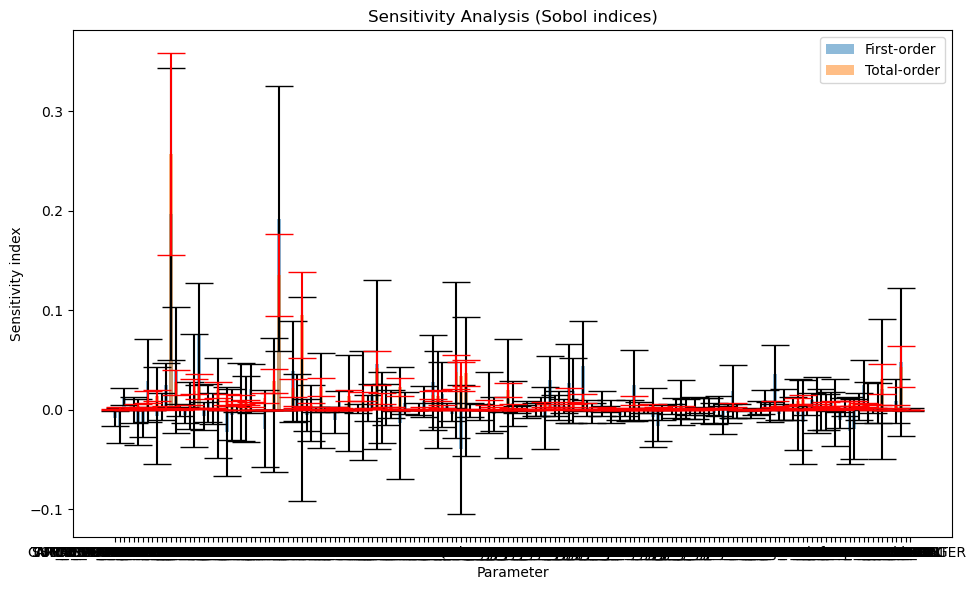

In [86]:
# Plot the results
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1, figsize=(10, 6))
indices = np.arange(problem['num_vars'])

ax.bar(indices, Si['S1'], yerr=Si['S1_conf'], align='center', alpha=0.5, ecolor='black', capsize=10, label='First-order')
ax.bar(indices, Si['ST'], yerr=Si['ST_conf'], align='center', alpha=0.5, ecolor='red', capsize=10, label='Total-order')

ax.set_xticks(indices)
ax.set_xticklabels(problem['names'])
ax.set_ylabel('Sensitivity index')
ax.set_xlabel('Parameter')
ax.set_title('Sensitivity Analysis (Sobol indices)')
ax.legend()
plt.tight_layout()
plt.show()

Logistic Regression on Numeric columns

In [87]:
# printing the shape of the X train numeric data
X_train_numeric_lr = X_train_lr[numeric_columns]
X_train_numeric_lr.shape, Y_train_lr.shape

((800, 76), (800,))

In [88]:
# declaring the logistic regression model
classifier = LogisticRegression(random_state=16)
# training the Logistic Regression model
classifier.fit(X_train_numeric_lr, Y_train_lr)

LogisticRegression(random_state=16)

In [89]:
# accuracy score on the training data
X_train_prediction_lr = classifier.predict(X_train_numeric_lr)
training_data_accuracy_lr = accuracy_score( Y_train_lr, X_train_prediction_lr)

In [90]:
# checking the accuracy score of the training data
print('Accuracy score of the test data : ', test_data_accuracy_lr)

Accuracy score of the test data :  0.675


In [91]:
#Running for Numeric colums
def model_eval(X_sample):
    X_sample_df = pd.DataFrame(X_sample, columns=X_train_numeric_lr.columns)
    y_pred_prob = classifier.predict_proba(X_sample_df)[:, 1]
    return y_pred_prob

# Define the problem
problem = {
    'num_vars': X_train_numeric_lr.shape[1],
    'names': X_train_numeric_lr.columns.tolist(),
    'bounds': [[0, 1]] * X_train_numeric_lr.shape[1]
}

# Generate samples
param_values = saltelli.sample(problem, 50)

# Evaluate the model for each sample
Y = np.array([model_eval(sample.reshape(1, -1)) for sample in param_values])

# Perform sensitivity analysis
Si = sobol.analyze(problem, Y.flatten())

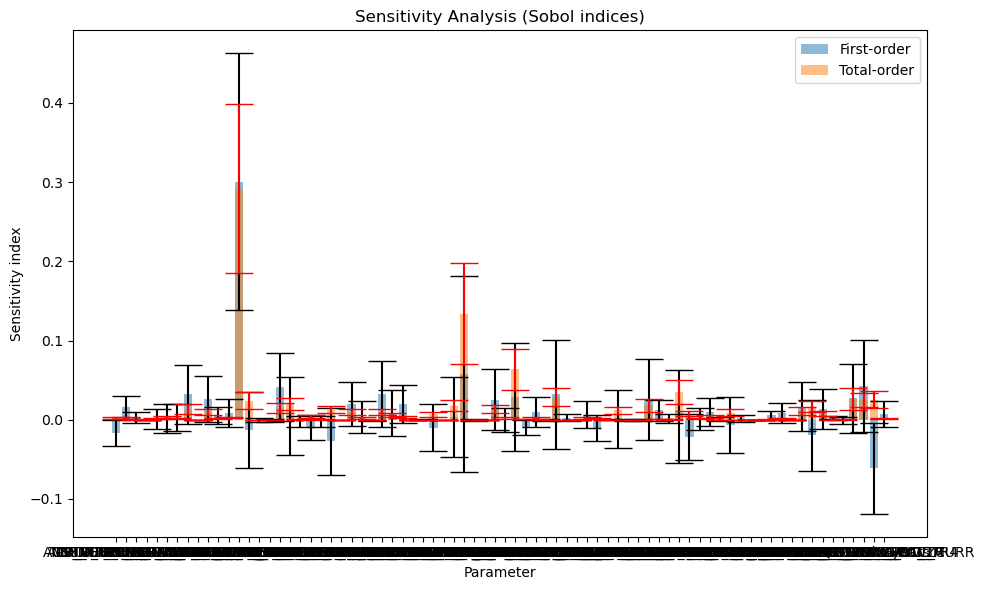

In [92]:
# Plot the results
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1, figsize=(10, 6))
indices = np.arange(problem['num_vars'])

ax.bar(indices, Si['S1'], yerr=Si['S1_conf'], align='center', alpha=0.5, ecolor='black', capsize=10, label='First-order')
ax.bar(indices, Si['ST'], yerr=Si['ST_conf'], align='center', alpha=0.5, ecolor='red', capsize=10, label='Total-order')

ax.set_xticks(indices)
ax.set_xticklabels(problem['names'])
ax.set_ylabel('Sensitivity index')
ax.set_xlabel('Parameter')
ax.set_title('Sensitivity Analysis (Sobol indices)')
ax.legend()
plt.tight_layout()
plt.show()

Logistic Regression Model on Numeric columns with 20 features at a time

In [93]:
X_train_numeric_lr = X_train_lr[numeric_columns]
X_train_numeric_lr = X_train_numeric_lr.iloc[:,[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19]]
X_train_numeric_lr.shape, Y_train_lr.shape
X_list= list(X_train_numeric_lr.columns)
X_list

['CR_PROD_CNT_IL',
 'AMOUNT_RUB_CLO_PRC',
 'APP_REGISTR_RGN_CODE',
 'TURNOVER_DYNAMIC_IL_1M',
 'CNT_TRAN_AUT_TENDENCY1M',
 'SUM_TRAN_AUT_TENDENCY1M',
 'AMOUNT_RUB_SUP_PRC',
 'SUM_TRAN_AUT_TENDENCY3M',
 'REST_DYNAMIC_FDEP_1M',
 'CNT_TRAN_AUT_TENDENCY3M',
 'REST_DYNAMIC_SAVE_3M',
 'CR_PROD_CNT_VCU',
 'REST_AVG_CUR',
 'CNT_TRAN_MED_TENDENCY1M',
 'AMOUNT_RUB_NAS_PRC',
 'TRANS_COUNT_SUP_PRC',
 'CNT_TRAN_CLO_TENDENCY1M',
 'SUM_TRAN_MED_TENDENCY1M',
 'TRANS_COUNT_NAS_PRC',
 'CR_PROD_CNT_TOVR']

In [94]:
X_test_numeric_lr = X_test_lr[numeric_columns]
X_test_numeric_lr = X_test_numeric_lr.iloc[:,[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19]]
X_test_lr.shape, Y_test_lr.shape
X_list= list(X_test_numeric_lr.columns)
X_list

['CR_PROD_CNT_IL',
 'AMOUNT_RUB_CLO_PRC',
 'APP_REGISTR_RGN_CODE',
 'TURNOVER_DYNAMIC_IL_1M',
 'CNT_TRAN_AUT_TENDENCY1M',
 'SUM_TRAN_AUT_TENDENCY1M',
 'AMOUNT_RUB_SUP_PRC',
 'SUM_TRAN_AUT_TENDENCY3M',
 'REST_DYNAMIC_FDEP_1M',
 'CNT_TRAN_AUT_TENDENCY3M',
 'REST_DYNAMIC_SAVE_3M',
 'CR_PROD_CNT_VCU',
 'REST_AVG_CUR',
 'CNT_TRAN_MED_TENDENCY1M',
 'AMOUNT_RUB_NAS_PRC',
 'TRANS_COUNT_SUP_PRC',
 'CNT_TRAN_CLO_TENDENCY1M',
 'SUM_TRAN_MED_TENDENCY1M',
 'TRANS_COUNT_NAS_PRC',
 'CR_PROD_CNT_TOVR']

In [95]:
# declaring the logistic regression model on X_train_numeric_1to20
classifier = LogisticRegression(random_state=16)
# training the Logistic Regression model
classifier.fit(X_train_numeric_lr, Y_train_lr)

LogisticRegression(random_state=16)

In [96]:
# accuracy score on the training data
X_train_prediction = classifier.predict(X_train_numeric_lr)
training_data_accuracy = accuracy_score( Y_train_lr, X_train_prediction_lr)

In [97]:
# checking the accuracy score of the test data
print('Accuracy score of the test data : ', test_data_accuracy_lr)

Accuracy score of the test data :  0.675


In [98]:
# running for Numeric colums
def model_eval(X_sample):
    X_sample_df = pd.DataFrame(X_sample, columns=X_train_numeric_lr.columns)
    y_pred_prob = classifier.predict_proba(X_sample_df)[:, 1]
    return y_pred_prob

# define the problem
problem = {
    'num_vars': X_train_numeric_lr.shape[1],
    'names': X_train_numeric_lr.columns.tolist(),
    'bounds': [[0, 1]] * X_train_numeric_lr.shape[1]
}

# generate samples
param_values = saltelli.sample(problem, 50)

# evaluate the model for each sample
Y = np.array([model_eval(sample.reshape(1, -1)) for sample in param_values])

# perform sensitivity analysis
Si = sobol.analyze(problem, Y.flatten())

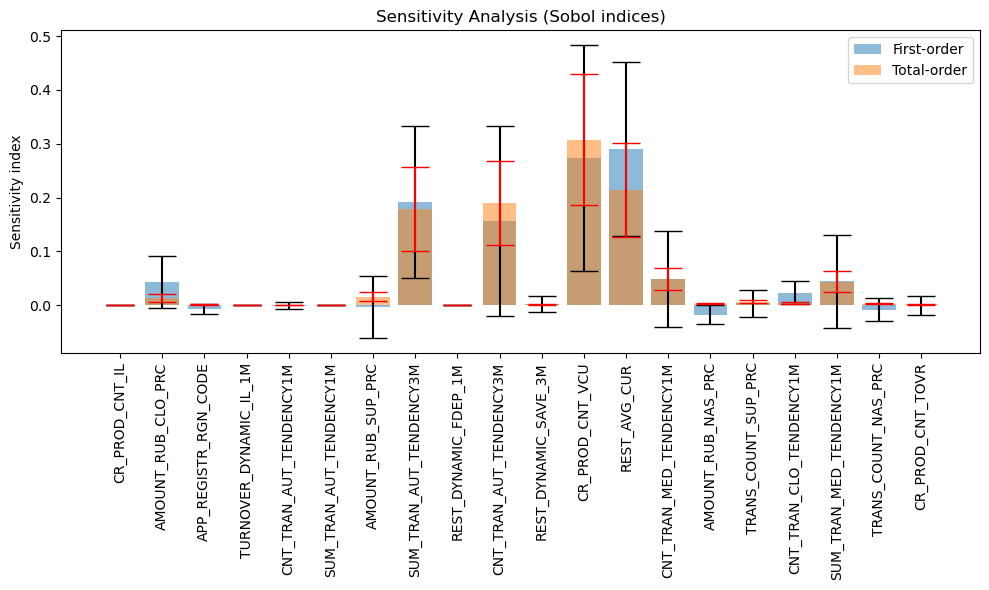

In [99]:
# Plot the results
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1, figsize=(10, 6))
indices = np.arange(problem['num_vars'])

ax.bar(indices, Si['S1'], yerr=Si['S1_conf'], align='center', alpha=0.5, ecolor='black', capsize=10, label='First-order')
ax.bar(indices, Si['ST'], yerr=Si['ST_conf'], align='center', alpha=0.5, ecolor='red', capsize=10, label='Total-order')

ax.set_xticks(indices)
ax.set_xticklabels(problem['names'])
ax.set_ylabel('Sensitivity index')
ax.set_xticklabels(X_list,rotation=90)
#plt.xticks(rotation=90)('Parameter')

ax.set_title('Sensitivity Analysis (Sobol indices)')
ax.legend()
plt.tight_layout()
plt.show()

Inference from Sensitivity Analysis

1. **Big Influence on Target**:
- TRANS_COUNT_ATM_PRC (S1: 0.2784) and AMOUNT_RUB_ATM_PRC (S1: 0.2004) have large influences on the target variable, so these features are key predictors
TURNOVER_PAYM (S1: 0.2037) and REST_AVG_PAYM (S1: 0.1412) are also influential

2. **Low or No Influence on Target**:
- It has no influence on the target variable: CR_PROD_CNT_PIL, TURNOVER_CC, CR_PROD_CNT_CC, REST_DYNAMIC_FDEP_3M, REST_DYNAMIC_IL_1M, CR_PROD_CNT_CCFP and LDEAL_GRACE_DAYS_PCT_MED (S1: 0.0). These features look not helpful for the predictive model
Very small negative impacts on the target variable are given by CNT_TRAN_MED_TEND
while TRANS_COUNT_ATM_PRC and AMOUNT_RUB_ATM_PRC have higher confidence levels of the impact on the target, such as 0.1322 and 0.1299, respectively. Thus, they are more reliable estimates.
columns with zero impacts on the target also have zero confidence. They become not useful in predicting the target variable and hence can be considered insignificant.

3. **Impact on Other Columns**:
 - Apart from the target column itself, TRANS_COUNT_ATM_PRC and TURNOVER_PAYM both have large impacts on the other columns, with S2 values of 0.3096 and 0.2017 respectively. It may be that there is some relation between these two variables and others in the dataset.
Columns like CR_PROD_CNT_PIL and TURNOVER_CC have little or no influence on other columns

4. **Mixed Influence**:
SUM_TRAN_MED_TEND and CNT_TRAN_CLO_TENDENCY3M show some possibility of an impact on the target and other columns but with a varying confidence level.


  TRANS_COUNT_ATM_PRC and TURNOVER_PAYM also significantly impact other columns (S2: 0.3096 and 0.2017 respectively). It might indicate relationships between these features and others in the dataset
  Columns like CR_PROD_CNT_PIL and TURNOVER_CC have minimal or zero impact on other columns

Mixed Influence:
  SUM_TRAN_MED_TENDENCY3M and CNT_TRAN_CLO_TENDENCY3M show some posibility of an impact on the target and other columns but with a varying confidence level

Logistic Regression with Hyperparameter tuning : ITERATION 2


In [100]:
from sklearn.linear_model import LogisticRegression

# Initialize the logistic regression model with custom hyperparameters
classifier = LogisticRegression(penalty='l2', C=0.1, solver='lbfgs', max_iter=50, random_state=16)

In [101]:
# training the Logistic Regression model
classifier.fit(X_train_lr, Y_train_lr)

LogisticRegression(C=0.1, max_iter=50, random_state=16)

In [102]:
# accuracy score on the training data
X_train_prediction_lr = classifier.predict(X_train_lr)
training_data_accuracy_lr = accuracy_score( Y_train_lr, X_train_prediction_lr)


In [103]:
# checking the accuracy score of the training data
print('Accuracy score of the training data : ', training_data_accuracy_lr)

Accuracy score of the training data :  0.70875


In [104]:
# checking the accuracy score on the test data
X_test_prediction_lr = classifier.predict(X_test_lr)
test_data_accuracy_lr = accuracy_score(Y_test_lr, X_test_prediction_lr)

In [105]:
# checking the accuracy score of the test data
print('Accuracy score of the test data : ', test_data_accuracy_lr)

Accuracy score of the test data :  0.7


In [106]:
#Running for hyperparameter tuned model
def model_eval(X_sample):
    X_sample_df = pd.DataFrame(X_sample, columns=X_train_lr.columns)
    y_pred_prob = classifier.predict_proba(X_sample_df)[:, 1]
    return y_pred_prob

# Define the problem
problem = {
    'num_vars': X_train_lr.shape[1],
    'names': X_train_lr.columns.tolist(),
    'bounds': [[0, 1]] * X_train_lr.shape[1]
}

# Generate samples
param_values = saltelli.sample(problem, 50)

# Evaluate the model for each sample
Y = np.array([model_eval(sample.reshape(1, -1)) for sample in param_values])

# Perform sensitivity analysis
Si = sobol.analyze(problem, Y.flatten())

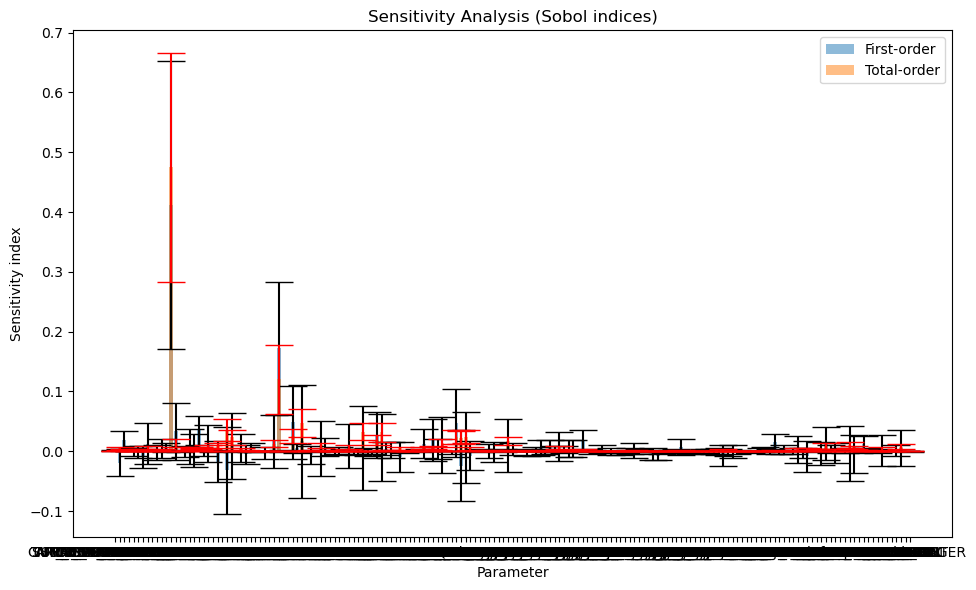

In [107]:
# Plot the results
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1, figsize=(10, 6))
indices = np.arange(problem['num_vars'])

ax.bar(indices, Si['S1'], yerr=Si['S1_conf'], align='center', alpha=0.5, ecolor='black', capsize=10, label='First-order')
ax.bar(indices, Si['ST'], yerr=Si['ST_conf'], align='center', alpha=0.5, ecolor='red', capsize=10, label='Total-order')

ax.set_xticks(indices)
ax.set_xticklabels(problem['names'])
ax.set_ylabel('Sensitivity index')
ax.set_xlabel('Parameter')
ax.set_title('Sensitivity Analysis (Sobol indices)')
ax.legend()
plt.tight_layout()
plt.show()

Logistic regression on Numeric data sliced

In [108]:
# training the Logistic Regression model Numeric data
classifier.fit(X_train_numeric_lr, Y_train_lr)

LogisticRegression(C=0.1, max_iter=50, random_state=16)

In [109]:
# accuracy score on the training data
X_train_prediction_lr = classifier.predict(X_train_numeric_lr)
training_data_accuracy_lr = accuracy_score(Y_train_lr, X_train_prediction_lr)

In [110]:
# checking the accuracy score of the test data
print('Accuracy score of the train data : ', training_data_accuracy_lr)

Accuracy score of the train data :  0.675


In [111]:
# checking the accuracy score on the test data
X_test_prediction_lr = classifier.predict(X_test_numeric_lr)
test_data_accuracy_lr = accuracy_score(Y_test_lr, X_test_prediction_lr)

In [112]:
# checking the accuracy score of the test data
print('Accuracy score of the test data : ', test_data_accuracy_lr)

Accuracy score of the test data :  0.72


In [113]:
# Running for Numeric colums
def model_eval(X_sample):
    X_sample_df = pd.DataFrame(X_sample, columns=X_train_numeric_lr.columns)
    y_pred_prob = classifier.predict_proba(X_sample_df)[:, 1]
    return y_pred_prob

# Define the problem
problem = {
    'num_vars': X_train_numeric_lr.shape[1],
    'names': X_train_numeric_lr.columns.tolist(),
    'bounds': [[0, 1]] * X_train_numeric_lr.shape[1]
}

# Generate samples
param_values = saltelli.sample(problem, 50)

# Evaluate the model for each sample
Y = np.array([model_eval(sample.reshape(1, -1)) for sample in param_values])

# Perform sensitivity analysis
Si = sobol.analyze(problem, Y.flatten())

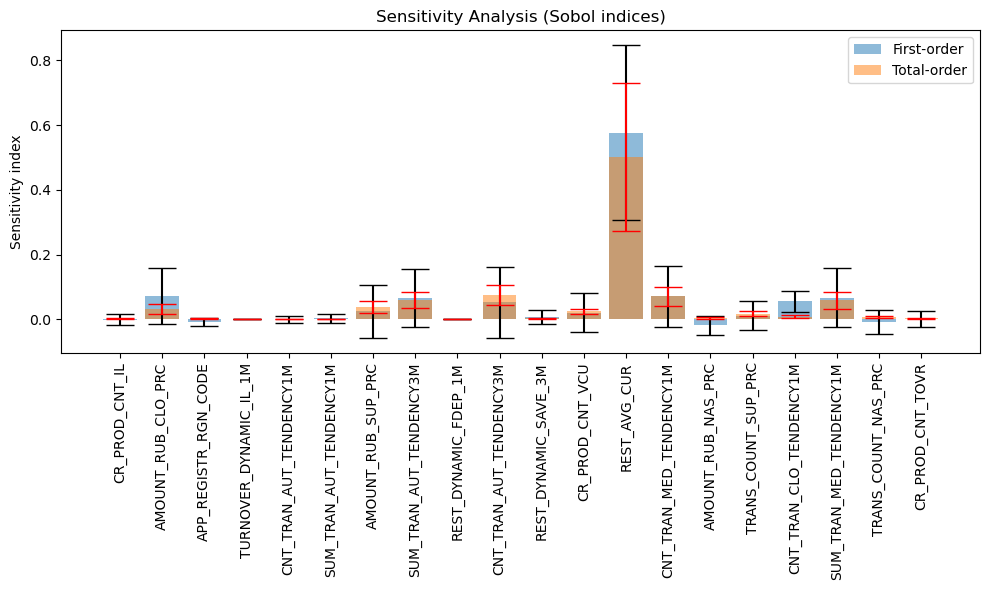

In [114]:
# Plot the results
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1, figsize=(10, 6))
indices = np.arange(problem['num_vars'])

ax.bar(indices, Si['S1'], yerr=Si['S1_conf'], align='center', alpha=0.5, ecolor='black', capsize=10, label='First-order')
ax.bar(indices, Si['ST'], yerr=Si['ST_conf'], align='center', alpha=0.5, ecolor='red', capsize=10, label='Total-order')

ax.set_xticks(indices)
ax.set_xticklabels(problem['names'])
ax.set_ylabel('Sensitivity index')
ax.set_xticklabels(X_list,rotation=90)
#plt.xticks(rotation=90)('Parameter')

ax.set_title('Sensitivity Analysis (Sobol indices)')
ax.legend()
plt.tight_layout()
plt.show()

Support Vector Machine Classifier on IMBALANCE Handled data: ITERATION 1

In [115]:
# import svm model
from sklearn import svm

In [116]:
#Create a svm Classifier
classifier_SVM = svm.SVC(kernel='linear',probability=True) # Linear Kernel

In [117]:
classifier_SVM.fit(X_train_svm, Y_train_svm)

SVC(kernel='linear', probability=True)

In [118]:
# accuracy score on the training data
X_train_prediction_svm = classifier_SVM.predict(X_train_svm)
training_data_accuracy_svm = accuracy_score(Y_train_svm, X_train_prediction_svm)

In [119]:
# checking the accuracy score of the training data
print('Accuracy score of the training data : ', training_data_accuracy_svm)

Accuracy score of the training data :  0.9


In [120]:
# accuracy score on the test data
X_test_prediction_svm = classifier_SVM.predict(X_test_svm)
test_data_accuracy_svm = accuracy_score(Y_test_svm, X_test_prediction_svm)

In [121]:
# checking the accuracy score of the test data
print('Accuracy score of the test data : ', test_data_accuracy_svm)

Accuracy score of the test data :  0.58


Use LIME and Shap to interpret the SVM model built


In [122]:
!pip install lime

Defaulting to user installation because normal site-packages is not writeable


In [123]:
# Import the LimeTabularExplainer module
from lime.lime_tabular import LimeTabularExplainer

# Get the class names
class_names = [0, 1]

# Get the feature names
feature_names = list(X_train_svm.columns)

# Fit the Explainer on the training data set using the LimeTabularExplainer
explainer = LimeTabularExplainer(X_train_svm.values, feature_names =
                                 feature_names,
                                 class_names = class_names,
                                 mode = 'classification')

In [124]:
i = 25  # Example index
instance = X_test_svm.iloc[i].values

# Explain the prediction
exp = explainer.explain_instance(instance, classifier_SVM.predict_proba, num_features=5)

# Plot the explanation
exp.show_in_notebook(show_table=True, show_all=False)

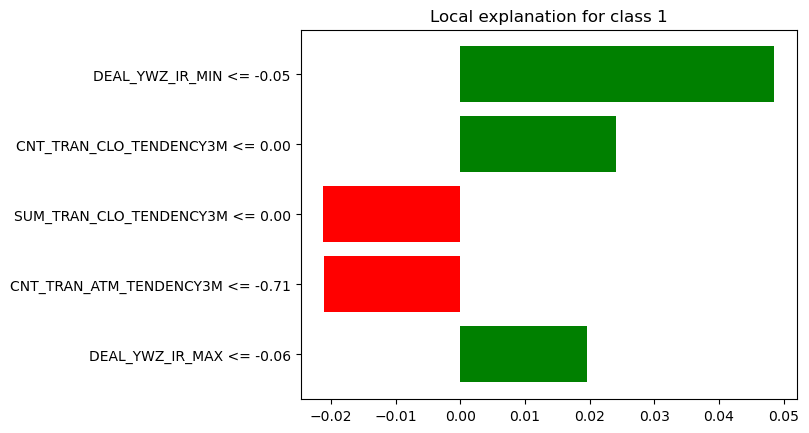

[('DEAL_YWZ_IR_MIN <= -0.05', 0.048532149755904364), ('CNT_TRAN_CLO_TENDENCY3M <= 0.00', 0.024028208125361442), ('SUM_TRAN_CLO_TENDENCY3M <= 0.00', -0.021204057834976735), ('CNT_TRAN_ATM_TENDENCY3M <= -0.71', -0.021045743468134967), ('DEAL_YWZ_IR_MAX <= -0.06', 0.019605399247475192)]


In [125]:
# Plot the explanation
fig = exp.as_pyplot_figure()

# Set the background color to white
fig.patch.set_facecolor('white')
ax = fig.gca()
ax.set_facecolor('white')

# Display the plot
plt.show()

# Print the explanation in text format
print(exp.as_list())

In [126]:
# printing the explainer
print(explainer)

In [127]:
!pip install shap

Defaulting to user installation because normal site-packages is not writeable


import shap
import matplotlib.pyplot as plt
from sklearn import svm

# Create a SHAP explainer
explainer = shap.KernelExplainer(classifier_SVM.predict_proba, X_train)

# Select instances to explain
#X_explain = X_test[:10]

# Calculate SHAP values
shap_values = explainer.shap_values(X_test)

# Plot the SHAP values for the first instance
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1][0], X_test[0], feature_names=[f'feature_{i}' for i in range(X.shape[1])])

# Summary plot for the first class
shap.summary_plot(shap_values[1], X_test, feature_names=[f'feature_{i}' for i in range(X.shape[1])])

import shap
import matplotlib.pyplot as plt
from sklearn import svm

# Create a SHAP explainer
explainer = shap.KernelExplainer(classifier_SVM.predict_proba, X_train)

# Calculate SHAP values
shap_values = explainer.shap_values(X_test)

# Plot the SHAP values for the first instance
shap.initjs()

# Correctly referencing the first instance in X_test
first_instance_index = X_test.index[0]
shap.force_plot(explainer.expected_value[1], shap_values[1][first_instance_index], X_test.loc[first_instance_index], feature_names=X_test.columns.tolist())

# Summary plot for the first class
shap.summary_plot(shap_values[1], X_test, feature_names=X_test.columns.tolist())


In [128]:
print(type(X_test))

<class 'pandas.core.frame.DataFrame'>


SVM - hyperparameter tuning: ITERATION 2

In [129]:
classifier_SVM = svm.SVC(C=10, kernel='rbf', gamma='scale', tol=1e-4, max_iter=1000)

In [130]:
# rechecking the shape of the data
Y_train_svm.shape, X_train_svm.shape, X_test_svm.shape, Y_test_svm.shape

((200,), (200, 171), (50, 171), (50,))

In [131]:
classifier_SVM.fit(X_train_svm, Y_train_svm)

SVC(C=10, max_iter=1000, tol=0.0001)

In [132]:
# accuracy score on the training data
X_train_prediction_svm = classifier_SVM.predict(X_train_svm)
training_data_accuracy_svm = accuracy_score(Y_train_svm, X_train_prediction_svm)

In [133]:
# checking the accuracy score of the test data
print('Accuracy score of the test data : ', test_data_accuracy_svm)

Accuracy score of the test data :  0.58


In [134]:
# Import the LimeTabularExplainer module
from lime.lime_tabular import LimeTabularExplainer

# Get the class names
class_names = [0, 1]

# Get the feature names
feature_names = list(X_train_svm.columns)

# Fit the Explainer on the training data set using the LimeTabularExplainer
explainer = LimeTabularExplainer(X_train_svm.values, feature_names =
                                 feature_names,
                                 class_names = class_names,
                                 mode = 'classification')

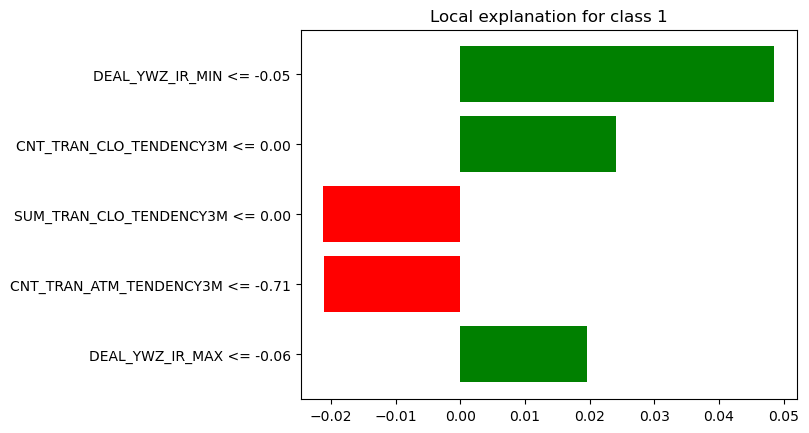

[('DEAL_YWZ_IR_MIN <= -0.05', 0.048532149755904364), ('CNT_TRAN_CLO_TENDENCY3M <= 0.00', 0.024028208125361442), ('SUM_TRAN_CLO_TENDENCY3M <= 0.00', -0.021204057834976735), ('CNT_TRAN_ATM_TENDENCY3M <= -0.71', -0.021045743468134967), ('DEAL_YWZ_IR_MAX <= -0.06', 0.019605399247475192)]


In [135]:
# Plot the explanation
fig = exp.as_pyplot_figure()

# Set the background color to white
fig.patch.set_facecolor('white')
ax = fig.gca()
ax.set_facecolor('white')

# Display the plot
plt.show()

# Print the explanation in text format
print(exp.as_list())

Confusion Matrix for the Logistic Regression Model

In [136]:
# importing Confusion Matrix dependency and seaborn
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [137]:
# getting the counts for the confusion matrix plot
cf_matrix_log = confusion_matrix(Y_test_lr, X_test_prediction_lr)
print(cf_matrix_log)

[[46 40]
 [16 98]]


In [138]:
# assigning tp, tn, fp & fn
tn, fp, fn, tp = cf_matrix_log.ravel()

print(tn, fp, fn, tp)

46 40 16 98


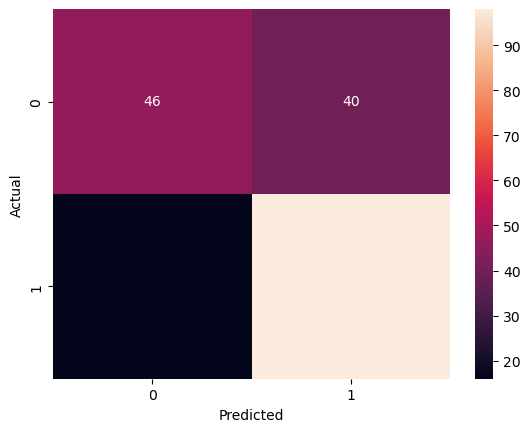

In [139]:
# Plotting the confusion matrix
sns.heatmap(cf_matrix_log, annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Confusion Matrix for the SVM Model

In [140]:
# getting the counts for the confusion matrix plot
cf_matrix_svm = confusion_matrix(Y_test_svm, X_test_prediction_svm)
print(cf_matrix_svm)

[[12 10]
 [11 17]]


In [141]:
# assigning tp, tn, fp & fn
tn_s, fp_s, fn_s, tp_s = cf_matrix_svm.ravel()

print(tn_s, fp_s, fn_s, tp_s)

12 10 11 17


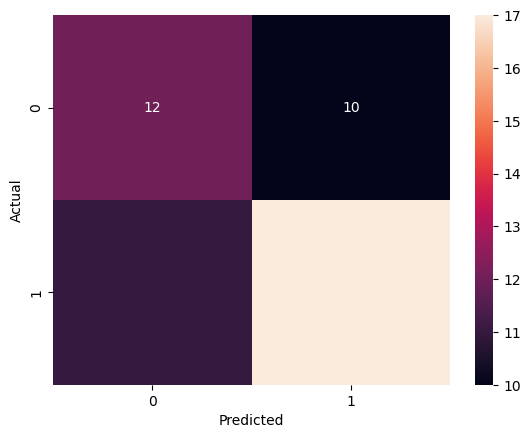

In [142]:
# Plotting the confusion matrix
sns.heatmap(cf_matrix_svm, annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Grid Search Cross Validation - Logistic Regression

In [143]:
# importing dependencies
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [144]:
# merging the train and test data for the grid search cross validation
X_lr = pd.concat([X_train_lr, X_test_lr], axis=0)
Y_lr = pd.concat([Y_train_lr, Y_test_lr], axis=0)

In [145]:
param_grid = {
    'C': [0.1, 1, 10, 100], # Regularization strength
    'solver': ['newton-cg', 'lbfgs', 'liblinear'], # Optimization algorithm
    'penalty': ['l2'] # Regularization term
}

In [146]:
# grid search
classifier_grid = GridSearchCV(estimator=classifier, param_grid=param_grid, cv=10, scoring='accuracy')

In [147]:
# fitting the data to our model
classifier_grid.fit(X_lr, Y_lr)

GridSearchCV(cv=10,
             estimator=LogisticRegression(C=0.1, max_iter=50, random_state=16),
             param_grid={'C': [0.1, 1, 10, 100], 'penalty': ['l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']},
             scoring='accuracy')

In [148]:
classifier_grid.cv_results_

{'mean_fit_time': array([0.05231123, 0.02783887, 0.03810837, 0.07495   , 0.02796938,
        0.04613276, 0.11145892, 0.02378109, 0.057183  , 0.18669937,
        0.02415113, 0.04947143]),
 'std_fit_time': array([0.00848183, 0.00298945, 0.00544549, 0.00956933, 0.00310535,
        0.00946667, 0.0232029 , 0.00276336, 0.01529911, 0.04773399,
        0.00346216, 0.02096971]),
 'mean_score_time': array([0.0036417 , 0.00293181, 0.00437894, 0.0040921 , 0.00443075,
        0.00435362, 0.00516648, 0.00384121, 0.00464272, 0.00371187,
        0.00451386, 0.00521963]),
 'std_score_time': array([0.00189851, 0.00213711, 0.00070159, 0.0007513 , 0.00101923,
        0.00077746, 0.00276726, 0.00076356, 0.00065199, 0.00147945,
        0.00187081, 0.00432711]),
 'param_C': masked_array(data=[0.1, 0.1, 0.1, 1, 1, 1, 10, 10, 10, 100, 100, 100],
              mask=[False, False, False, False, False, False, False, False,
                    False, False, False, False],
        fill_value='?',
             dtype

In [149]:
# checking accuracy
grid_accuracy = classifier_grid.best_score_
print(grid_accuracy)

0.671


Grid Search Cross Validation - SVM Regression

In [150]:
# merging the train and test data for the grid search cross validation
X_svm = pd.concat([X_train_svm, X_test_svm], axis=0)
Y_svm = pd.concat([Y_train_svm, Y_test_svm], axis=0)

In [151]:
from sklearn.model_selection import KFold,cross_val_score
k_folds = KFold(n_splits = 10)

In [152]:
# from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV
param_grid = {
    'kernel': ['linear'],
    'C': [1, 10, 100]
}

In [153]:
# grid search
classifier_grid_svm = GridSearchCV(svm.SVC(), param_grid, cv=10, scoring='accuracy')

In [154]:
# fitting the data to our model
classifier_grid_svm.fit(X_svm, Y_svm)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [1, 10, 100], 'kernel': ['linear']},
             scoring='accuracy')

In [155]:
classifier_grid.cv_results_

{'mean_fit_time': array([0.05231123, 0.02783887, 0.03810837, 0.07495   , 0.02796938,
        0.04613276, 0.11145892, 0.02378109, 0.057183  , 0.18669937,
        0.02415113, 0.04947143]),
 'std_fit_time': array([0.00848183, 0.00298945, 0.00544549, 0.00956933, 0.00310535,
        0.00946667, 0.0232029 , 0.00276336, 0.01529911, 0.04773399,
        0.00346216, 0.02096971]),
 'mean_score_time': array([0.0036417 , 0.00293181, 0.00437894, 0.0040921 , 0.00443075,
        0.00435362, 0.00516648, 0.00384121, 0.00464272, 0.00371187,
        0.00451386, 0.00521963]),
 'std_score_time': array([0.00189851, 0.00213711, 0.00070159, 0.0007513 , 0.00101923,
        0.00077746, 0.00276726, 0.00076356, 0.00065199, 0.00147945,
        0.00187081, 0.00432711]),
 'param_C': masked_array(data=[0.1, 0.1, 0.1, 1, 1, 1, 10, 10, 10, 100, 100, 100],
              mask=[False, False, False, False, False, False, False, False,
                    False, False, False, False],
        fill_value='?',
             dtype

In [156]:
# checking accuracy
grid_accuracy = classifier_grid_svm.best_score_
print(grid_accuracy)

0.6479999999999999


10-Fold Cross Validation for Logistic Regression

In [157]:
# import dependency
from sklearn.model_selection import KFold, cross_val_score

In [158]:
# running 10-fold cv on Logistic Regression
k_folds = KFold(n_splits = 10)
scores = cross_val_score(classifier, X_lr, Y_lr, cv = k_folds)

In [159]:
# checking the scores
print(scores)

[0.66 0.65 0.64 0.7  0.66 0.64 0.64 0.6  0.73 0.71]


In [160]:
# the mean score
print(scores.mean())

0.663


10-Fold Cross Validation for SVM

In [161]:
# running 10-fold cv on SVM
scores_svm = cross_val_score(classifier_SVM, X_svm, Y_svm, cv = k_folds)

In [162]:
# checking the scores
print(scores_svm)

[0.56 0.6  0.52 0.56 0.64 0.56 0.6  0.84 0.64 0.68]


In [163]:
# the mean score
print(scores_svm.mean())

0.62


ROC

In [164]:
from sklearn import metrics

In [165]:
# ROC for Logistic Regression
print("area under curve (auc): ", metrics.roc_auc_score(Y_test_lr, X_test_prediction_lr))

area under curve (auc):  0.6972664218686251


In [166]:
# ROC for SVM
print("area under curve (auc): ", metrics.roc_auc_score(Y_test_svm, X_test_prediction_svm))

area under curve (auc):  0.5762987012987013


In [167]:
# compute predicted probabilities
pred_prob1 = classifier.predict_proba(X_test_numeric_lr)

classifier_SVM = SVC(probability=True, random_state=42)
classifier_SVM.fit(X_train_svm, Y_train_svm)
pred_prob2 = classifier_SVM.predict_proba(X_test_svm)

In [168]:
from sklearn.metrics import roc_curve, roc_auc_score
# Compute ROC curves
fpr1, tpr1, _ = roc_curve(Y_test_lr, pred_prob1[:, 1], pos_label=1)
fpr2, tpr2, _ = roc_curve(Y_test_svm, pred_prob2[:, 1], pos_label=1)

# Random ROC curve for baseline
random_probs = np.random.rand(len(Y_test_svm))
p_fpr, p_tpr, _ = roc_curve(Y_test_svm, random_probs, pos_label=1)

# AUC scores
auc_score1 = roc_auc_score(Y_test_lr, pred_prob1[:, 1])
auc_score2 = roc_auc_score(Y_test_svm, pred_prob2[:, 1])

# Print AUC scores
print("AUC Score for Logistic Regression:", auc_score1)
print("AUC Score for SVM:", auc_score2)


AUC Score for Logistic Regression: 0.704967360261118
AUC Score for SVM: 0.5827922077922078


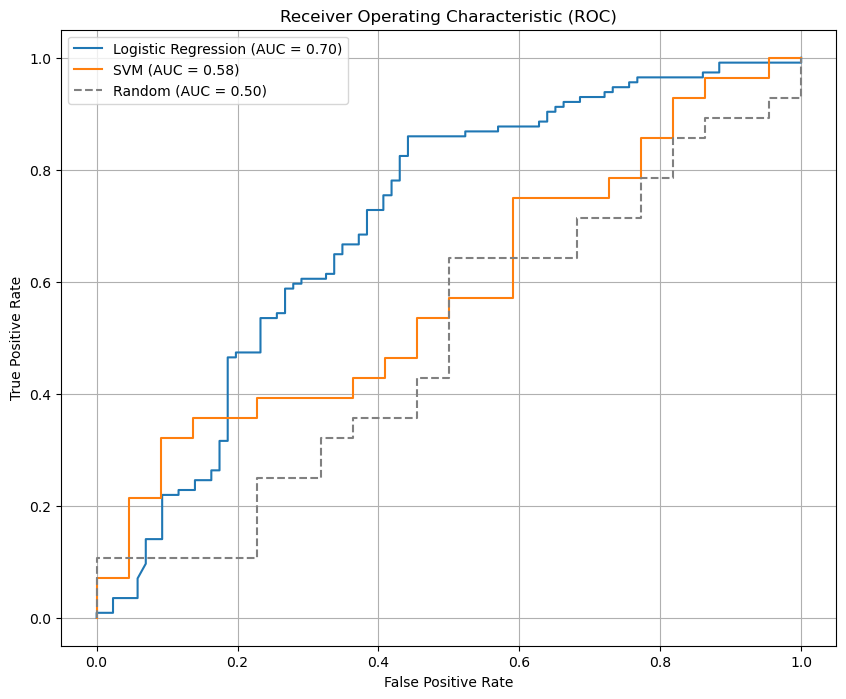

In [169]:
# Plot ROC curves
plt.figure(figsize=(10, 8))
plt.plot(fpr1, tpr1, label='Logistic Regression (AUC = {:.2f})'.format(auc_score1))
plt.plot(fpr2, tpr2, label='SVM (AUC = {:.2f})'.format(auc_score2))
plt.plot(p_fpr, p_tpr, linestyle='--', color='gray', label='Random (AUC = {:.2f})'.format(0.5))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='best')
plt.grid(True)
plt.show()

SVM AUC: 0.5762987012987013


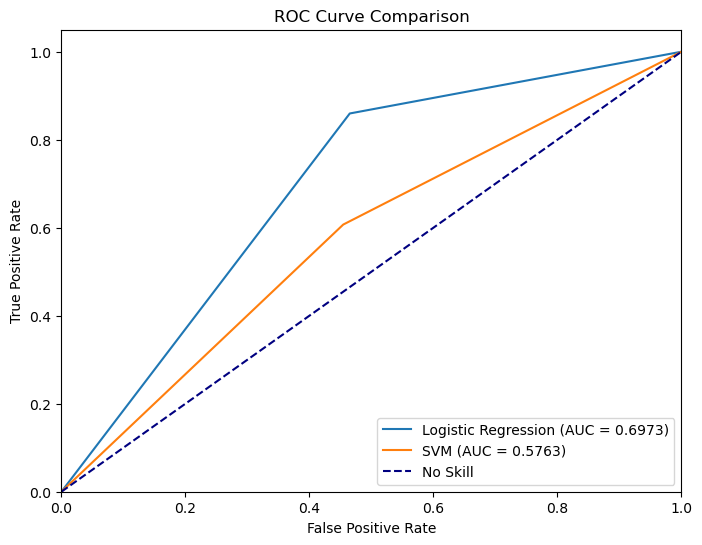

In [170]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

fpr_logistic, tpr_logistic, _ = roc_curve(Y_test_lr, X_test_prediction_lr)
roc_auc_logistic = auc(fpr_logistic, tpr_logistic)

fpr_svm, tpr_svm, _ = roc_curve(Y_test_svm, X_test_prediction_svm)
roc_auc_svm = auc(fpr_svm, tpr_svm)

# Print AUC scoresprint("Logistic Regression AUC:", roc_auc_logistic)
print("SVM AUC:", roc_auc_svm)
# Plot ROC curves (optional)import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.plot(fpr_logistic, tpr_logistic, label='Logistic Regression (AUC = %0.4f)' % roc_auc_logistic)
plt.plot(fpr_svm, tpr_svm, label='SVM (AUC = %0.4f)' % roc_auc_svm)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--', label='No Skill')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc="lower right")
plt.show()

In [185]:
numeric_data = df_balanced[numeric_columns+['TARGET']]

<Axes: >

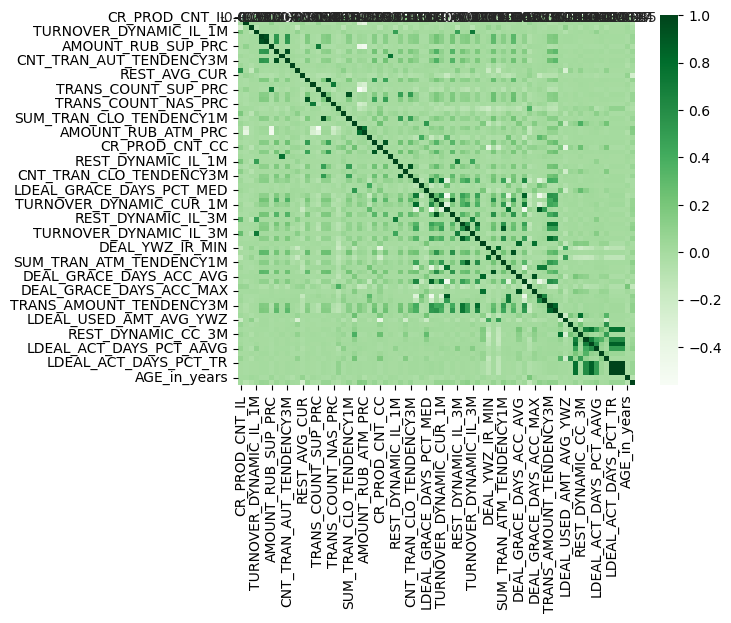

In [186]:
#Performing Correlation to tune models Performance.
matrix = numeric_data.corr()
# plotting correlation matrix
sns.heatmap(matrix, cmap="Greens", annot=True)

In [200]:
matrix[['TARGET']].sort_values(by='TARGET', key=abs, ascending=[False])

,TARGET
TARGET,1.000000
REST_AVG_CUR,-0.247391
TRANS_COUNT_ATM_PRC,0.156171
CLNT_SETUP_TENOR,-0.144356
AMOUNT_RUB_ATM_PRC,0.136635
CNT_TRAN_ATM_TENDENCY1M,0.115597
SUM_TRAN_ATM_TENDENCY1M,0.111941
TRANS_AMOUNT_TENDENCY3M,0.101166
TURNOVER_DYNAMIC_PAYM_3M,0.100243
TRANS_CNT_TENDENCY3M,0.098864


In [202]:
#taking 10 most significant columns
strong_numeric_columns= list(matrix[['TARGET']].sort_values(by='TARGET', key=abs, ascending=[False])[1:11].index)
strong_numeric_columns

['REST_AVG_CUR',
 'TRANS_COUNT_ATM_PRC',
 'CLNT_SETUP_TENOR',
 'AMOUNT_RUB_ATM_PRC',
 'CNT_TRAN_ATM_TENDENCY1M',
 'SUM_TRAN_ATM_TENDENCY1M',
 'TRANS_AMOUNT_TENDENCY3M',
 'TURNOVER_DYNAMIC_PAYM_3M',
 'TRANS_CNT_TENDENCY3M',
 'LDEAL_ACT_DAYS_PCT_AAVG']

In [203]:
strong_numeric_columns = strong_numeric_columns[0:10]

In [213]:
# For logistic regression model with strongly correlated columns
df_logistic_corr = df_balanced.sample(n=1000, random_state=42)[strong_numeric_columns+['TARGET']]
X_train_lr_corr, X_test_lr_corr, Y_train_lr_corr, Y_test_lr_corr = split_data(df_logistic_corr, size=0.8)

In [214]:
# For SVM classifier model with strongly correlated columns
df_svm_corr = df_balanced.sample(n=250, random_state=42)[strong_numeric_columns+['TARGET']]
X_train_svm_corr, X_test_svm_corr, Y_train_svm_corr, Y_test_svm_corr = split_data(df_svm_corr, size=0.8)with strongly correlated columns

In [215]:
# Display the shapes with Correlation Columns
print("Logistic Regression Training with Correlation Columns:", X_train_lr_corr.shape, Y_train_lr_corr.value_counts())
print("Logistic Regression Test with Correlation Columns:", X_test_lr_corr.shape, Y_test_lr_corr.value_counts())
print("SVM Training with Correlation Columns:", X_train_svm_corr.shape, Y_train_svm_corr.value_counts())
print("SVM Test with Correlation Columns:", X_test_svm_corr.shape, Y_test_svm_corr.value_counts())

Logistic Regression Training with Correlation Columns: (800, 10) TARGET
1    458
0    342
Name: count, dtype: int64
Logistic Regression Test with Correlation Columns: (200, 10) TARGET
1    114
0     86
Name: count, dtype: int64
SVM Training with Correlation Columns: (200, 10) TARGET
1    110
0     90
Name: count, dtype: int64
SVM Test with Correlation Columns: (50, 10) TARGET
1    28
0    22
Name: count, dtype: int64


In [216]:
# checking the count of classes ('0', '1')
print(Y_train_lr_corr.value_counts(), Y_test_lr_corr.value_counts())
print(Y_train_svm_corr.value_counts(), Y_test_svm_corr.value_counts())

TARGET
1    458
0    342
Name: count, dtype: int64 TARGET
1    114
0     86
Name: count, dtype: int64
TARGET
1    110
0     90
Name: count, dtype: int64 TARGET
1    28
0    22
Name: count, dtype: int64


In [217]:
# declaring the logistic regression model
logistic_classifier = LogisticRegression(random_state=16)

In [218]:
# training the Logistic Regression model
logistic_classifier.fit(X_train_lr_corr, Y_train_lr_corr)

LogisticRegression(random_state=16)

In [223]:
# accuracy score on the training data
X_train_prediction_lr_corr = logistic_classifier.predict(X_train_lr_corr)
training_data_accuracy_lr_corr = accuracy_score( Y_train_lr_corr, X_train_prediction_lr_corr)

In [224]:
# checking the accuracy score of the training data
print('Accuracy score of the training data with correlation: ', training_data_accuracy_lr_corr)

Accuracy score of the training data with correlation:  0.6925


In [230]:
# checking the accuracy score on the test data
X_test_prediction_lr_corr = logistic_classifier.predict(X_test_lr_corr)
test_data_accuracy_lr_corr = accuracy_score( Y_test_lr_corr, X_test_prediction_lr_corr)

In [232]:
# checking the accuracy score of the test data
print('Accuracy score of the test data with correlation: ', test_data_accuracy_lr_corr)

Accuracy score of the test data with correlation:  0.72


In [233]:
#Create a svm Classifier
classifier_SVM_corr = svm.SVC(kernel='linear',probability=True) # Linear Kernel

In [234]:
classifier_SVM_corr.fit(X_train_svm_corr, Y_train_svm_corr)

SVC(kernel='linear', probability=True)

In [235]:
# accuracy score on the training data
X_train_prediction_svm_corr = classifier_SVM_corr.predict(X_train_svm_corr)
training_data_accuracy_svm_corr = accuracy_score(Y_train_svm_corr, X_train_prediction_svm_corr)

In [236]:
# checking the accuracy score of the training data
print('Accuracy score of the training data with correlation: ', training_data_accuracy_svm_corr)

Accuracy score of the training data with correlation:  0.725


In [237]:
# accuracy score on the test data
X_test_prediction_svm_corr = classifier_SVM_corr.predict(X_test_svm_corr)
test_data_accuracy_svm_corr = accuracy_score(Y_test_svm_corr, X_test_prediction_svm_corr)

In [238]:
# checking the accuracy score of the test data
print('Accuracy score of the test data with correlation: ', test_data_accuracy_svm_corr)

Accuracy score of the test data with correlation:  0.56


After considering top 10 most correlated columns from our data. Our accuracy has increased slightly Correlation

After sensitivity analysis we have considered these 10 columns as significant.
['AMOUNT_RUB_SUP_PRC' 'REST_AVG_CUR' 'TRANS_COUNT_ATM_PRC'
 'AMOUNT_RUB_ATM_PRC' 'CNT_TRAN_CLO_TENDENCY3M' 'REST_DYNAMIC_CUR_1M'
 'SUM_TRAN_SUP_TENDENCY1M' 'CNT_TRAN_SUP_TENDENCY1M' 'CLNT_SETUP_TENOR'
 'TRANS_AMOUNT_TENDENCY3M']

In [239]:
sensitive_columns= ['AMOUNT_RUB_SUP_PRC','REST_AVG_CUR','TRANS_COUNT_ATM_PRC',
 'AMOUNT_RUB_ATM_PRC','CNT_TRAN_CLO_TENDENCY3M','REST_DYNAMIC_CUR_1M',
 'SUM_TRAN_SUP_TENDENCY1M','CNT_TRAN_SUP_TENDENCY1M','CLNT_SETUP_TENOR',
 'TRANS_AMOUNT_TENDENCY3M']

In [240]:
# For logistic regression model with sensitive columns
df_logistic_pysr = df_balanced.sample(n=1000, random_state=42)[sensitive_columns+['TARGET']]
X_train_lr_pysr, X_test_lr_pysr, Y_train_lr_pysr, Y_test_lr_pysr = split_data(df_logistic_pysr, size=0.8)

In [242]:
# For SVM classifier model with sensitive columns
df_svm_pysr = df_balanced.sample(n=250, random_state=42)[sensitive_columns+['TARGET']]
X_train_svm_pysr, X_test_svm_pysr, Y_train_svm_pysr, Y_test_svm_pysr = split_data(df_svm_pysr, size=0.8)

In [243]:
# Display the shapes with sensitive Columns
print("Logistic Regression Training with sensitive Columns:", X_train_lr_pysr.shape, Y_train_lr_pysr.value_counts())
print("Logistic Regression Test with sensitive Columns:", X_test_lr_pysr.shape, Y_test_lr_pysr.value_counts())
print("SVM Training with sensitive Columns:", X_train_svm_pysr.shape, Y_train_svm_pysr.value_counts())
print("SVM Test with sensitive Columns:", X_test_svm_pysr.shape, Y_test_svm_pysr.value_counts())

Logistic Regression Training with sensitive Columns: (800, 10) TARGET
1    458
0    342
Name: count, dtype: int64
Logistic Regression Test with sensitive Columns: (200, 10) TARGET
1    114
0     86
Name: count, dtype: int64
SVM Training with sensitive Columns: (200, 10) TARGET
1    110
0     90
Name: count, dtype: int64
SVM Test with sensitive Columns: (50, 10) TARGET
1    28
0    22
Name: count, dtype: int64


In [244]:
# checking the count of classes ('0', '1')
print(Y_train_lr_pysr.value_counts(), Y_test_lr_pysr.value_counts())
print(Y_train_svm_pysr.value_counts(), Y_test_svm_pysr.value_counts())

TARGET
1    458
0    342
Name: count, dtype: int64 TARGET
1    114
0     86
Name: count, dtype: int64
TARGET
1    110
0     90
Name: count, dtype: int64 TARGET
1    28
0    22
Name: count, dtype: int64


In [245]:
# declaring the logistic regression model for sensitivity 
logistic_classifier_pysr = LogisticRegression(random_state=16)

In [246]:
# training the Logistic Regression model
logistic_classifier_pysr.fit(X_train_lr_pysr, Y_train_lr_pysr)

LogisticRegression(random_state=16)

In [247]:
# accuracy score on the training data
X_train_prediction_lr_pysr = logistic_classifier_pysr.predict(X_train_lr_pysr)
training_data_accuracy_lr_pysr = accuracy_score( Y_train_lr_pysr, X_train_prediction_lr_pysr)

In [248]:
# checking the accuracy score of the training data
print('Accuracy score of the training data with sensitivity: ', training_data_accuracy_lr_pysr)

Accuracy score of the training data with sensitivity:  0.68875


In [249]:
# checking the accuracy score on the test data
X_test_prediction_lr_pysr = logistic_classifier_pysr.predict(X_test_lr_pysr)
test_data_accuracy_lr_pysr = accuracy_score( Y_test_lr_pysr, X_test_prediction_lr_pysr)

In [250]:
# checking the accuracy score of the test data
print('Accuracy score of the test data with sensitivity: ', test_data_accuracy_lr_pysr)

Accuracy score of the test data with sensitivity:  0.695


In [251]:
#Create a svm Classifier
classifier_SVM_pysr = svm.SVC(kernel='linear',probability=True) # Linear Kernel

In [252]:
classifier_SVM_pysr.fit(X_train_svm_pysr, Y_train_svm_pysr)

SVC(kernel='linear', probability=True)

In [253]:
# accuracy score on the training data
X_train_prediction_svm_pysr = classifier_SVM_pysr.predict(X_train_svm_pysr)
training_data_accuracy_svm_pysr = accuracy_score(Y_train_svm_pysr, X_train_prediction_svm_pysr)

In [254]:
# checking the accuracy score of the training data
print('Accuracy score of the training data with sensitivity: ', training_data_accuracy_svm_pysr)

Accuracy score of the training data with sensitivity:  0.7


In [255]:
# accuracy score on the test data
X_test_prediction_svm_pysr = classifier_SVM_pysr.predict(X_test_svm_pysr)
test_data_accuracy_svm_pysr = accuracy_score(Y_test_svm_pysr, X_test_prediction_svm_pysr)

In [256]:
# checking the accuracy score of the test data
print('Accuracy score of the test data with sensitivity: ', test_data_accuracy_svm_pysr)

Accuracy score of the test data with sensitivity:  0.68
